In [1]:
import networkx as nx

In [20]:
%run "../Pokemon EDA-Core.ipynb"

In [23]:
df = pd.DataFrame(data)

# Combine 'Type 1' and 'Type 2' into a single column
stacked_types = pd.concat([df['Type 1'], df['Type 2'].replace('None', '')]).dropna()

# Get the frequency of each combined type
type_frequencies = stacked_types.value_counts().reset_index(name='Frequency')
#type_frequencies.head()
#pokemon_effectiveness_df.stack()
df_type_effectiveness = pd.DataFrame(type_effectiveness_data)

# Set 'Attacking_Type' as the index
df_type_effectiveness.set_index('Attacking_Type', inplace=True)

df_type_effectiveness.loc['Water']

Normal      1.0
Fire        0.5
Water       0.5
Electric    2.0
Grass       2.0
Ice         0.5
Fighting    1.0
Poison      1.0
Ground      1.0
Flying      1.0
Psychic     1.0
Bug         1.0
Rock        1.0
Ghost       1.0
Dragon      1.0
Dark        1.0
Steel       0.5
Fairy       1.0
Name: Water, dtype: float64

## What is the distribution of Pokémon types?
Pokémon types consist of what elements or specializations the Pokémon possesses. These typings can range from nature-based (fire, water, ground, etc..) to domain based (fighting, ghost, psyhic), Pokémon being of certain typings provide an advantage or disadvantage against other Pokémon.
We can see from the "Comparison of Weaknesses to Resistances by Pokémon Typings", typings such as Steel, Dragon and Fire are strong for they have many resistances that can be a competitive advantage in battle, while Pokémon Typings such as Ice and Rock are vulnerable as they have many weaknesses in comparison to other Pokémon Typings. Pokémon typings is considerd the first principle to under for Pokémon battling as it provides a distinct advantage regardless of the player's skill and can be a deciding factor to victory.

Network Graphs below attempt to visualize the relationships, separated into two charts to better visualize and space the content by direction of the effectiveness. "Advantages" is where the Attacking Pokémon will have an effective attack, increased damage against the Defending Pokémon, "Resistances" is where the Defending Pokémon received reduced damage from the Attacking Pokémon.

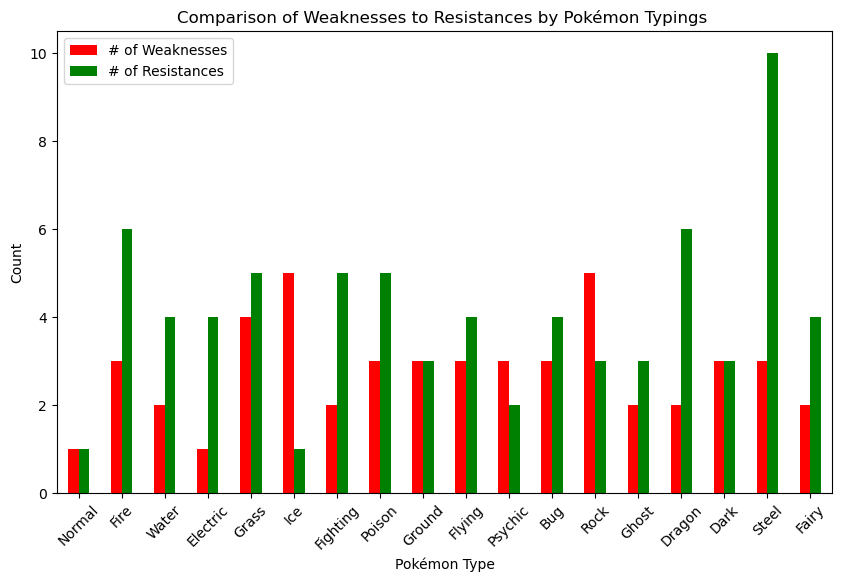

In [24]:
# Count the occurrences of 2 (Effective) and 0.5 (Non-Effective) for each attacking type
weakness_counts = (df_type_effectiveness.iloc[:, 1:] == 2).sum(1)
resistance_counts = (df_type_effectiveness.iloc[:, 1:] <= 0.5).sum(1)
# Combine the counts into a single DataFrame
counts_df = pd.DataFrame({
    '# of Weaknesses': weakness_counts,
    '# of Resistances': resistance_counts
})

# Plot the bar graph
fig, ax = plt.subplots(figsize=(10, 6))
counts_df.plot(kind='bar', ax=ax, rot=45, color=['red', 'green'])
ax.set_title('Comparison of Weaknesses to Resistances by Pokémon Typings ')
ax.set_xlabel('Pokémon Type')
ax.set_ylabel('Count')
plt.show()

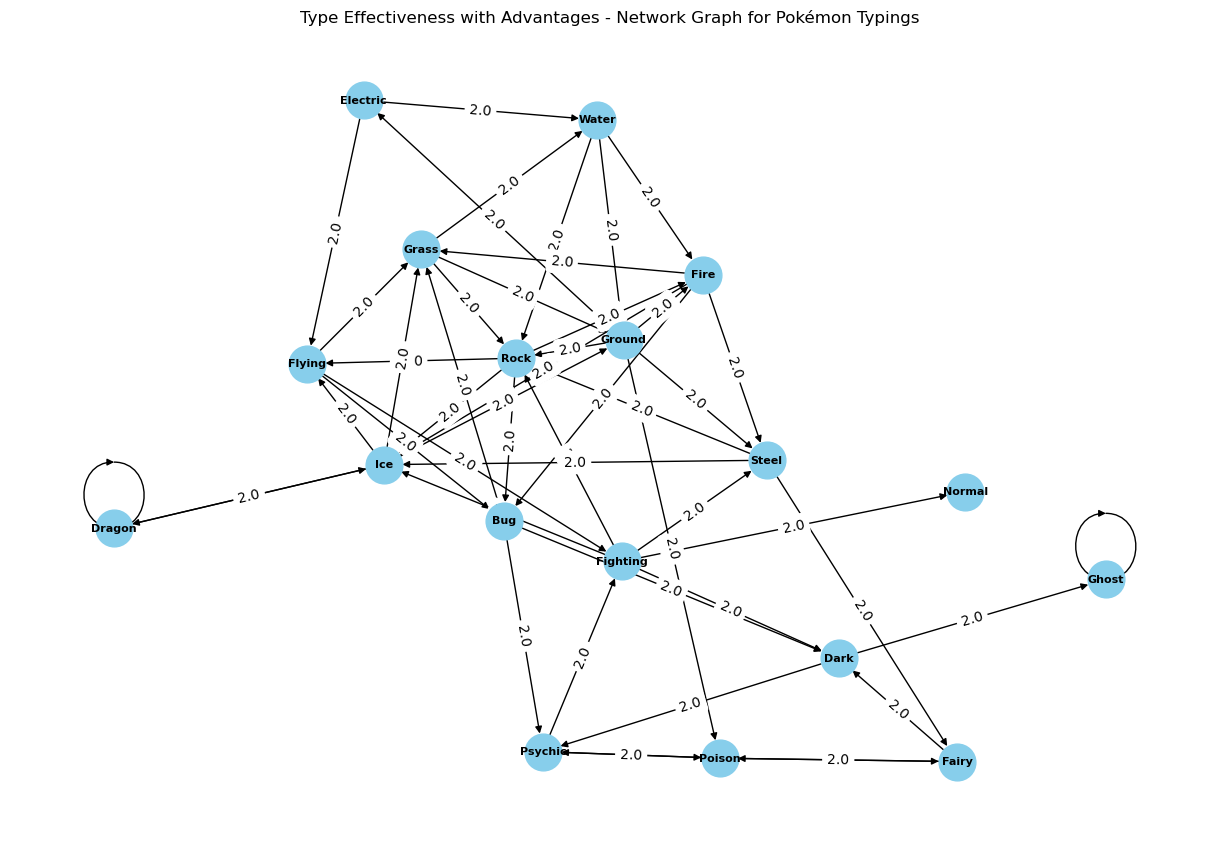

In [5]:

# Create a directed graph
G = nx.DiGraph()

# Add edges and nodes to the graph
for attacking_type in df_type_effectiveness.index:
    for defending_type, effectiveness in df_type_effectiveness.loc[attacking_type].items():
        if effectiveness == 2.0:  # Only add edges for non-neutral effectiveness
            G.add_edge(defending_type, attacking_type, weight=effectiveness)

# Use kamada_kawai_layout for better graph layout
pos = nx.kamada_kawai_layout(G)

# Plot the network graph with adjusted figure size
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_size=8)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))

plt.title('Type Effectiveness with Advantages - Network Graph for Pokémon Typings')
plt.show()

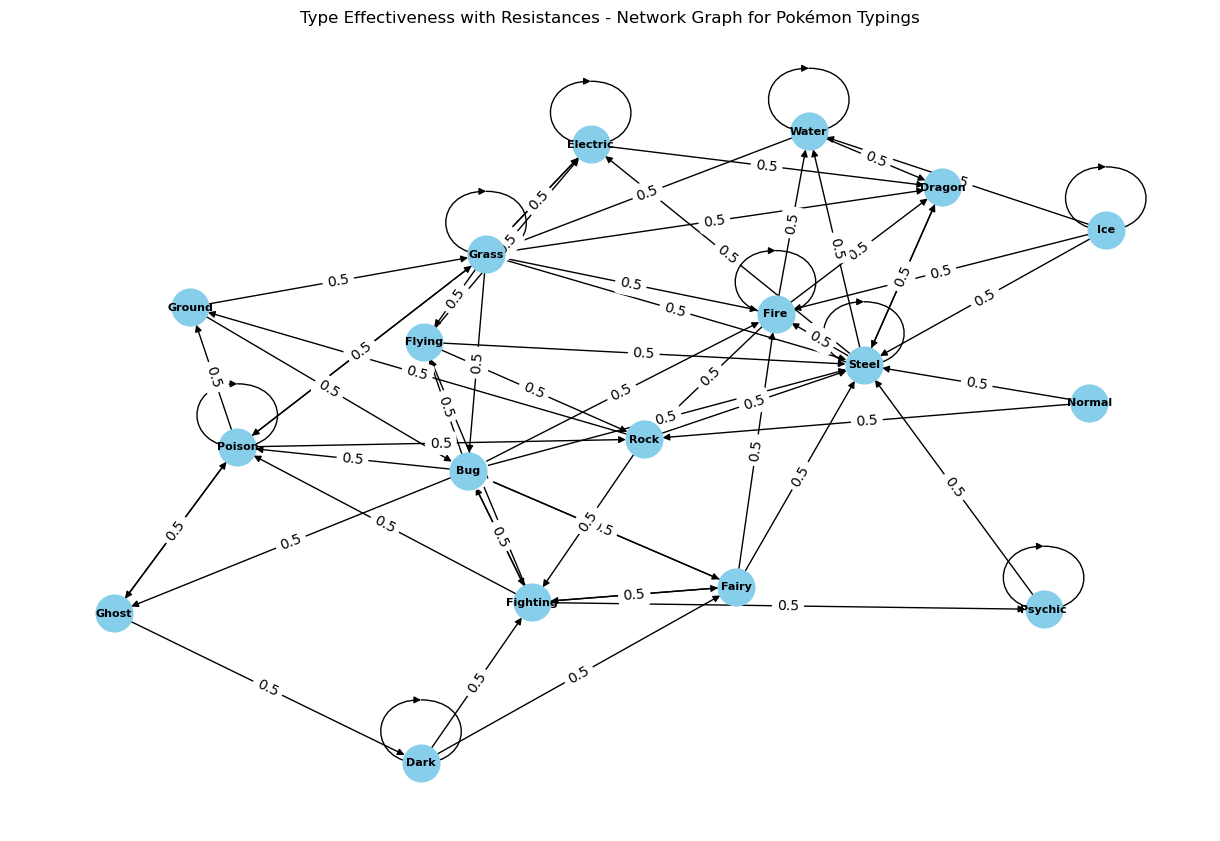

In [6]:
# Create a directed graph
G = nx.DiGraph()

# Add edges and nodes to the graph
for attacking_type in df_type_effectiveness.index:
    for defending_type, effectiveness in df_type_effectiveness.loc[attacking_type].items():
        if effectiveness == 0.5:  # Only add edges for non-neutral effectiveness
            G.add_edge(defending_type, attacking_type, weight=effectiveness)

# Use kamada_kawai_layout for better graph layout
#tried another graph and it was very condense and harder to see
pos = nx.kamada_kawai_layout(G)

# Plot the network graph with adjusted figure size
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_size=8)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))

plt.title('Type Effectiveness with Resistances - Network Graph for Pokémon Typings')
plt.show()

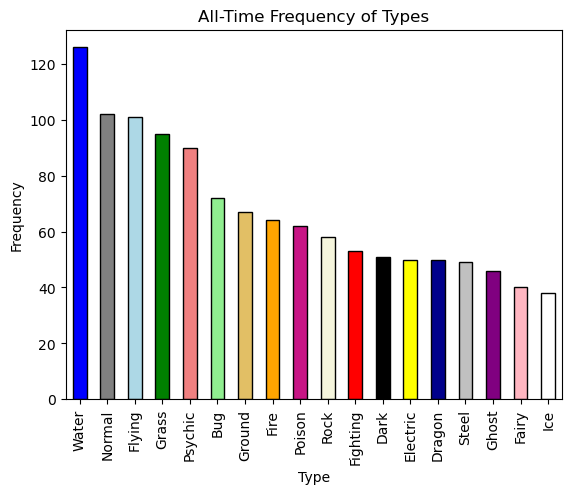

In [7]:
# Create a bar chart with custom colors and borders
type_frequencies.plot(kind='bar', x='index', y='Frequency', color=[type_colors.get(type, 'gray') for type in type_frequencies['index']], edgecolor='black')
plt.ylabel('Frequency')
plt.xlabel('Type')
plt.title('All-Time Frequency of Types')
plt.legend().set_visible(False)  # This line hides the legend - we are using the colors associated to the type
plt.show()

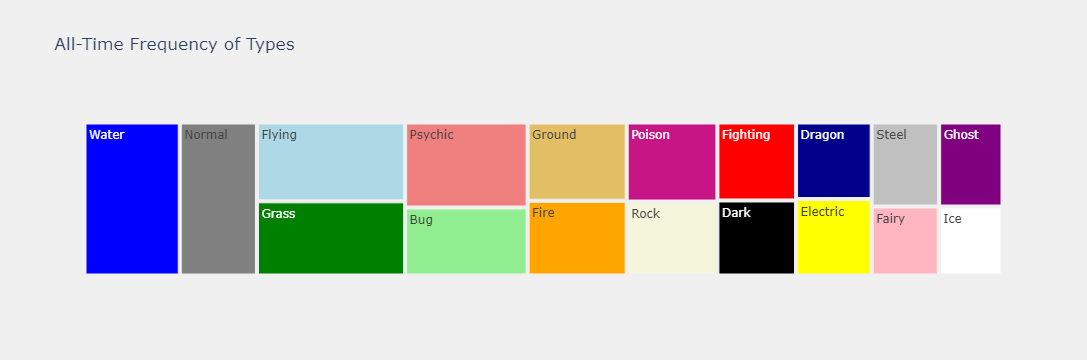

In [8]:
# Assuming type_frequencies is a DataFrame with columns 'index' and 'Frequency'
fig_treemap_types = px.treemap(type_frequencies, 
                 path=['index'],
                 values='Frequency',
                 color='index',
                 color_discrete_map=type_colors,
                 title='All-Time Frequency of Types')

# Hide the legend
fig_treemap_types.update_layout(legend=dict(title=dict(text='Type'), orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1))
# Set background color for the entire figure
fig_treemap_types.update_layout(
    plot_bgcolor='rgb(240,240,240)',  # Background color of the plot area
    paper_bgcolor='rgb(240,240,240)'  # Background color of the entire figure
)
# Show the treemap with border
fig_treemap_types.show()

In [9]:
# Combine 'Type 1' and 'Type 2' into a single column
stacked_types = pd.concat([df['Type 1'], df['Type 2'].replace('None', '')])

# Create a DataFrame with the stacked types and count frequencies
type_counts = stacked_types.value_counts()
    



In [10]:
# Give me a dataset of each Generation and Types introduced
# Create DataFrames for 'Type 1' and 'Type 2' with 'Generation' column
df_type1 = df[['Type 1', 'Generation']].rename(columns={'Type 1': 'Type'})
df_type2 = df[['Type 2', 'Generation']].rename(columns={'Type 2': 'Type'})

# Concatenate the two DataFrames
stacked_types_generation = pd.concat([df_type1, df_type2.replace('None', '')])

# Calculate the frequency of each combination of 'Generation' and 'Type'
frequency_df = stacked_types_generation.groupby(['Generation', 'Type']).size().reset_index(name='Frequency')

# Pivot the DataFrame to have 'Type' as columns
pivot_df = frequency_df.pivot(index='Generation', columns='Type', values='Frequency').fillna(0)

# Display the result
print(stacked_types_generation)

      Type  Generation
0    Grass           1
1    Grass           1
2    Grass           1
3    Grass           1
4     Fire           1
..     ...         ...
795  Fairy           6
796  Fairy           6
797  Ghost           6
798   Dark           6
799  Water           6

[1600 rows x 2 columns]


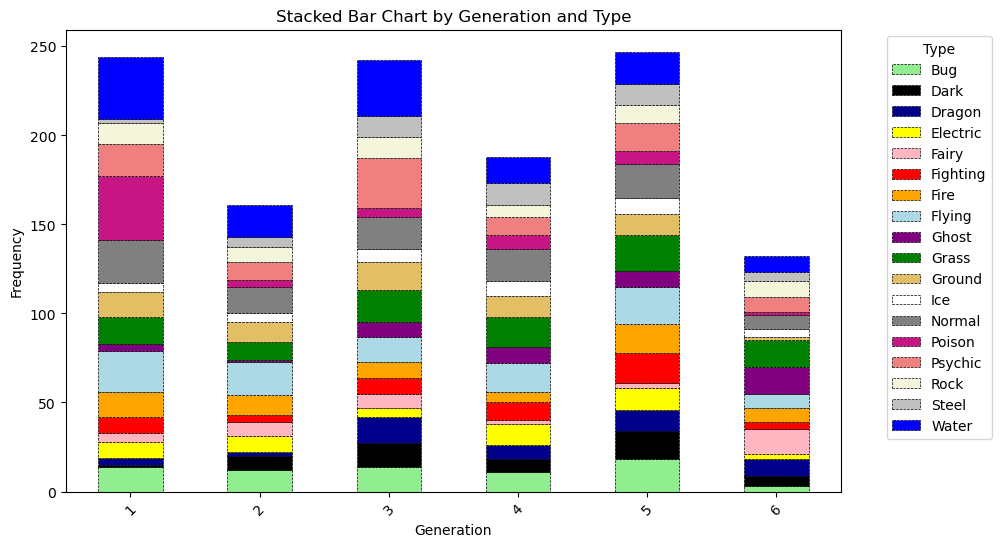

In [11]:
# Create a stacked bar chart with custom colors
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6),edgecolor="black", linestyle='dashed', linewidth=0.5, color=[type_colors.get(type, 'gray') for type in pivot_df.columns])

plt.title('Stacked Bar Chart by Generation and Type')
plt.xlabel('Generation')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
# Specify the legend outside the chart
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


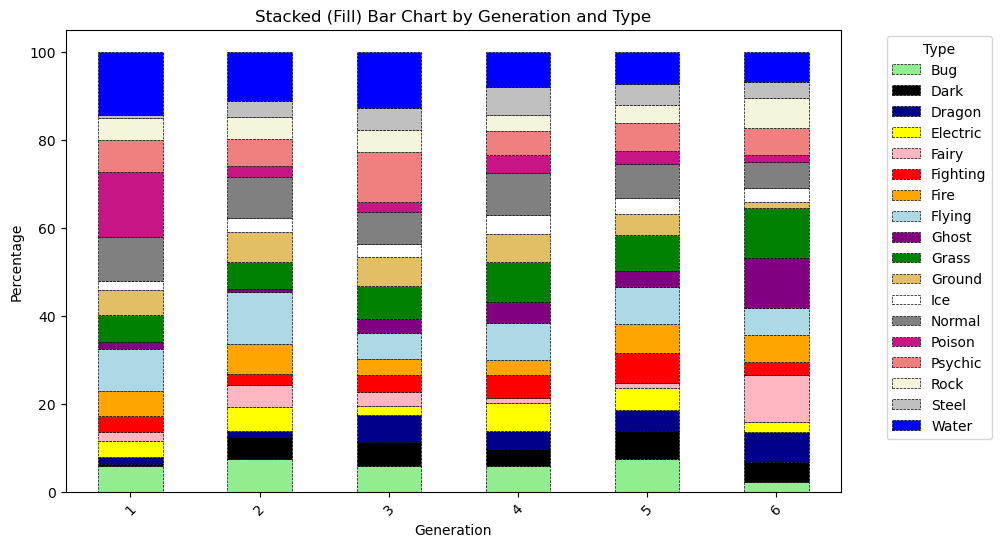

In [12]:

# Normalize the data to represent percentages
pivot_df_percentage = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Create a stacked bar chart with custom colors
ax = pivot_df_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), color=[type_colors.get(type, 'gray') for type in pivot_df_percentage.columns], linestyle='dashed', linewidth=0.5, edgecolor='black')

plt.title('Stacked (Fill) Bar Chart by Generation and Type')
plt.xlabel('Generation')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

# Add a legend
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [13]:
#pivot_df.stack()
stacked_types_generation.columns.tolist()

['Type', 'Generation']

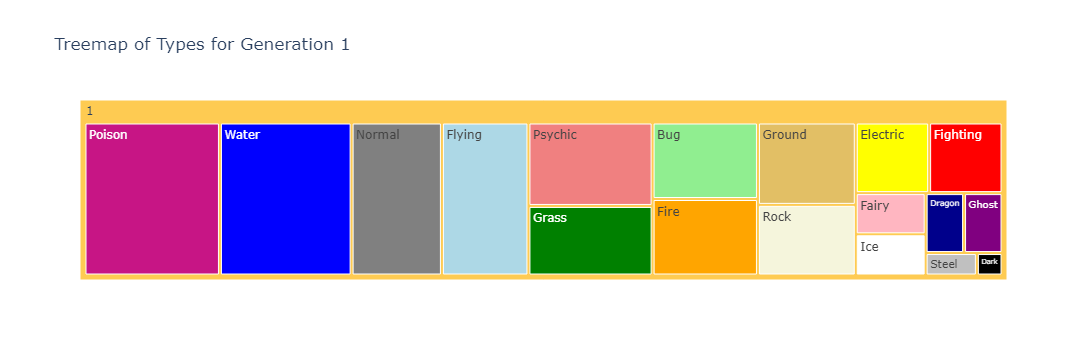

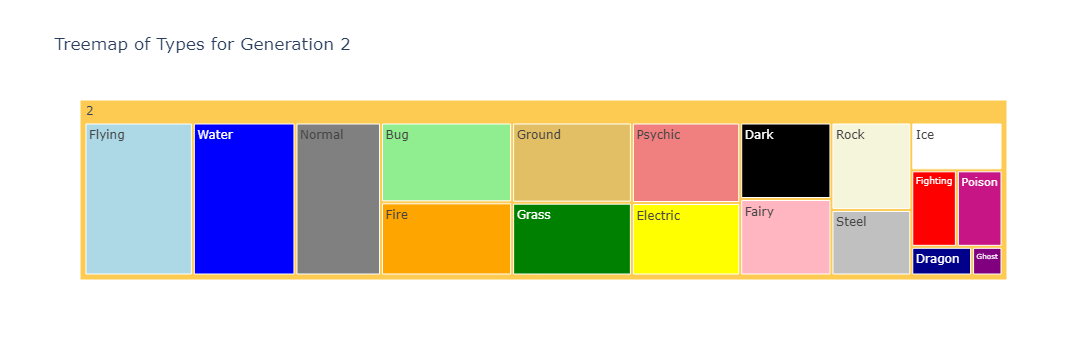

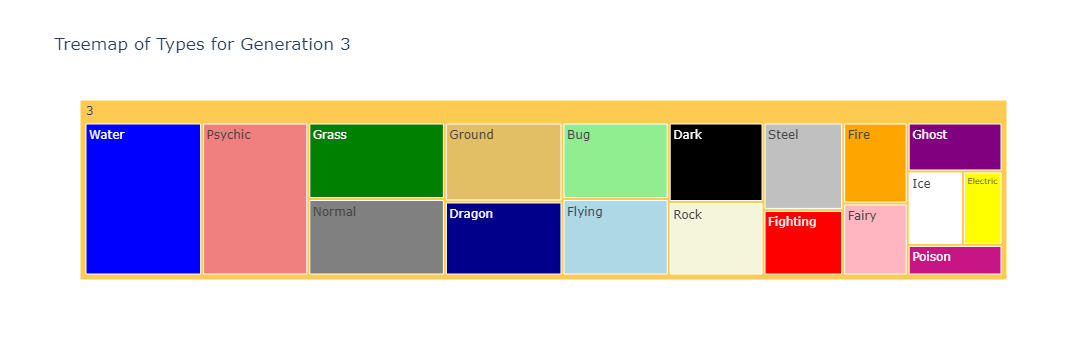

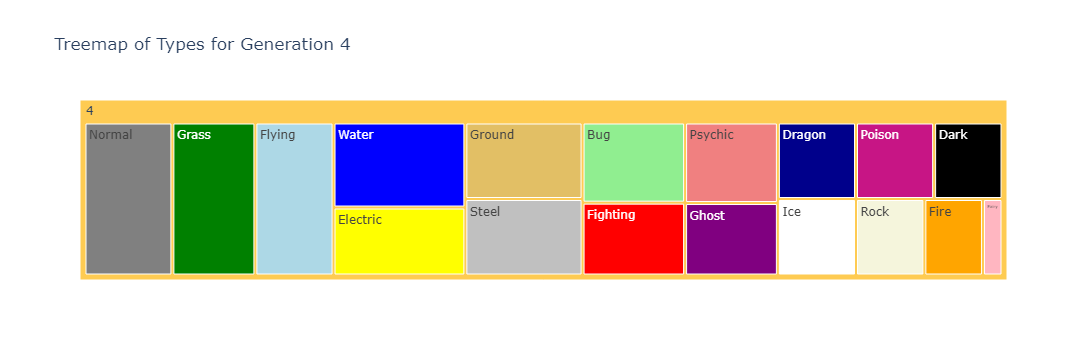

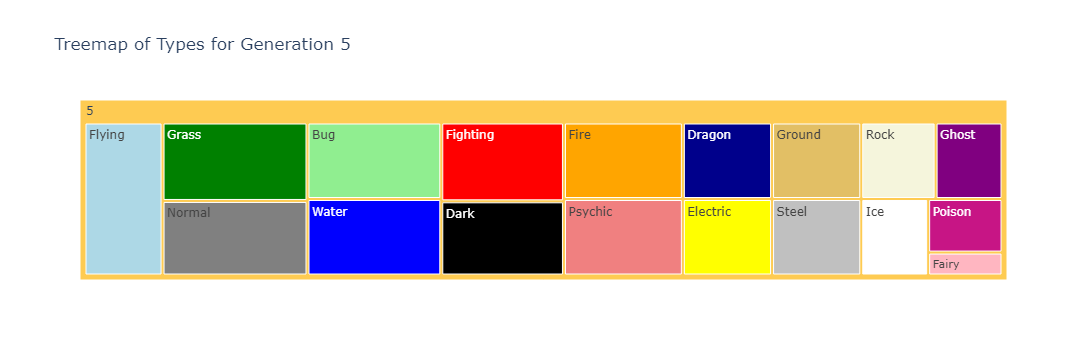

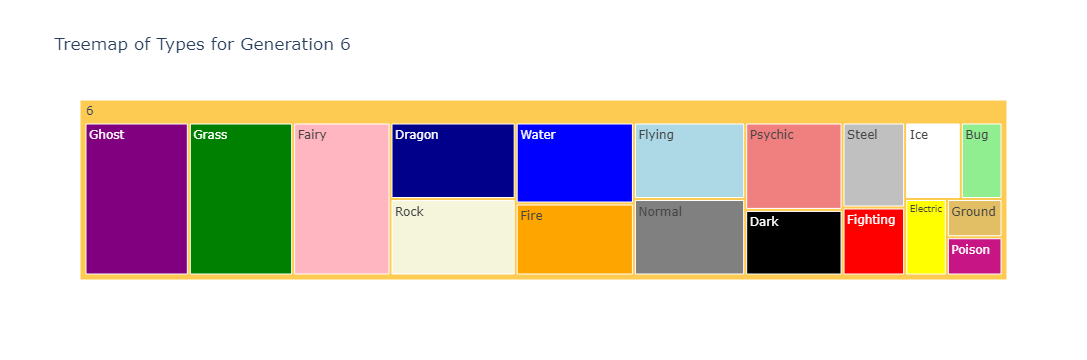

In [14]:
# Assuming stacked_types_generation is your DataFrame
df_count = stacked_types_generation.groupby(['Generation', 'Type']).size().reset_index(name='Count')

# Loop through each generation and create a treemap
for gen in df_count['Generation'].unique():
    # Filter the DataFrame for the current generation
    df_filtered = df_count[df_count['Generation'] == gen]

    # Create a treemap for the current generation
    fig = px.treemap(df_filtered,
                     path=['Generation', 'Type'],
                     values='Count',
                     title=f'Treemap of Types for Generation {gen}',
                     color='Type',
                     color_discrete_map=type_colors)

    # Show the figure
    fig.show()

In [15]:
# Assuming stacked_types_generation is your DataFrame
df_count = stacked_types_generation.groupby(['Generation', 'Type']).size().reset_index(name='Count')

# Sort the DataFrame by Generation and Type
df_count = df_count.sort_values(['Generation', 'Type'])

# Create an initial row for Generation 1 with variance 0 for each Type
initial_row = pd.DataFrame({'Generation': [1] * len(df_count['Type'].unique()), 'Type': df_count['Type'].unique(), 'Count': 0, 'Variance': 0})

# Concatenate the initial row with the original DataFrame
df_count = pd.concat([initial_row, df_count])

# Calculate the variance between consecutive generations
df_count['Variance'] = df_count.groupby('Type')['Count'].diff()
# Drop rows with NaN values (resulting from the diff operation)
df_count = df_count.dropna()

# Update Variance to 0 for rows where Generation is '1'
#df_count.loc[df_count['Generation'] == 1, 'Variance'] = 0

# Display the DataFrame with variance between generations
df_count[df_count['Type'] == 'Water']

Generation   Type  Count  Variance
17            1  Water     35      35.0
35            2  Water     18     -17.0
53            3  Water     31      13.0
71            4  Water     15     -16.0
89            5  Water     18       3.0
107           6  Water      9      -9.0

In [16]:
# Choose a specific Type for the waterfall chart
selected_type = 'Water'

# Filter the data for the selected Type
selected_type_data = df_count[df_count['Type'] == selected_type]


df_waterfall =selected_type_data
df_waterfall

Generation   Type  Count  Variance
17            1  Water     35      35.0
35            2  Water     18     -17.0
53            3  Water     31      13.0
71            4  Water     15     -16.0
89            5  Water     18       3.0
107           6  Water      9      -9.0

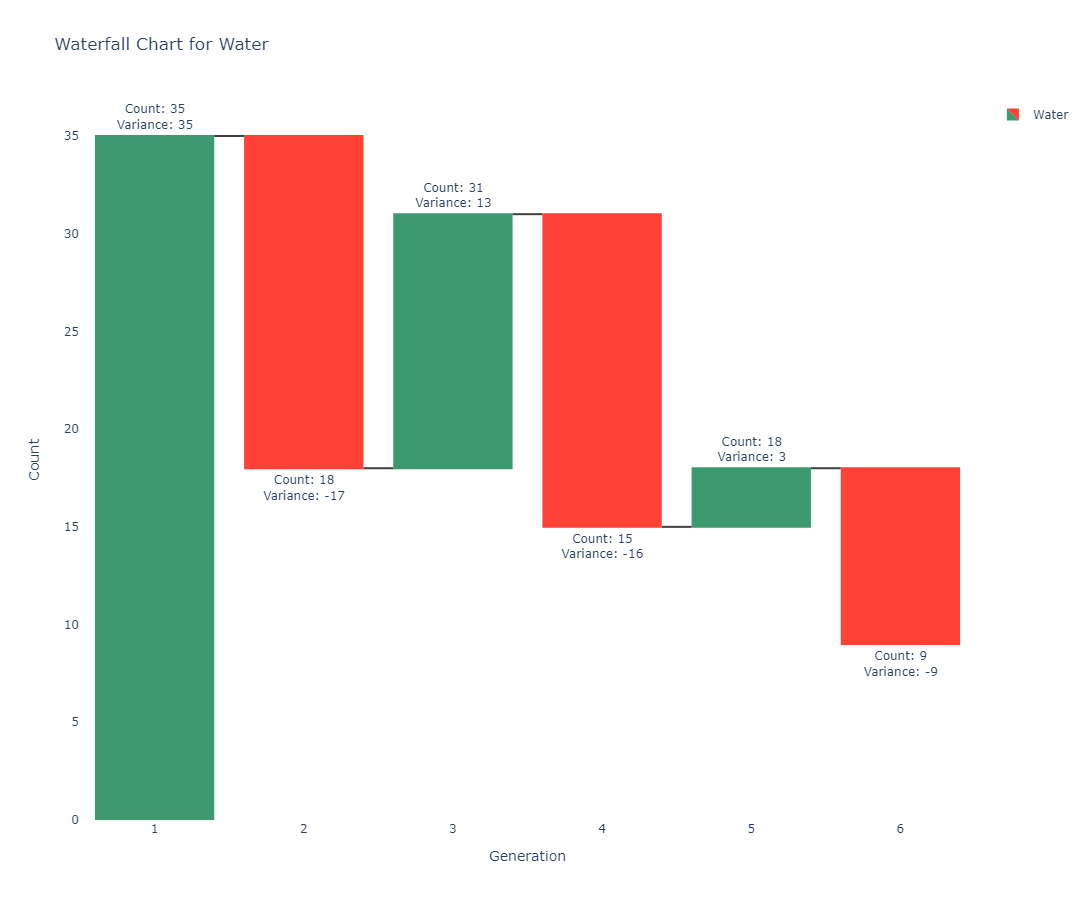

In [17]:
# Create a waterfall chart
fig = go.Figure(go.Waterfall(
    name=selected_type,
    orientation="v",
    measure=df_waterfall['Variance'],
    x=df_waterfall['Generation'],
    textposition="outside",
    text=df_waterfall.apply(lambda row: f"Count: {int(row['Count'])}<br>Variance: {int(row['Variance'])}" if row['Variance'] != 0 else f"Count: {int(row['Count'])}",
                            axis=1),
    y=df_waterfall['Variance'],
    connector={"line": {"color": "rgb(63, 63, 63)"}},
))

# Update layout
fig.update_layout(
    title=f"Waterfall Chart for {selected_type}",
    showlegend=True,
    xaxis_title="Generation",
    yaxis_title="Count",
    paper_bgcolor='rgba(0, 0, 0, 0)',  # Set background color
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Set plot area color
    height=900  # Set the desired height in pixels
)

# Show the figure
fig.show()

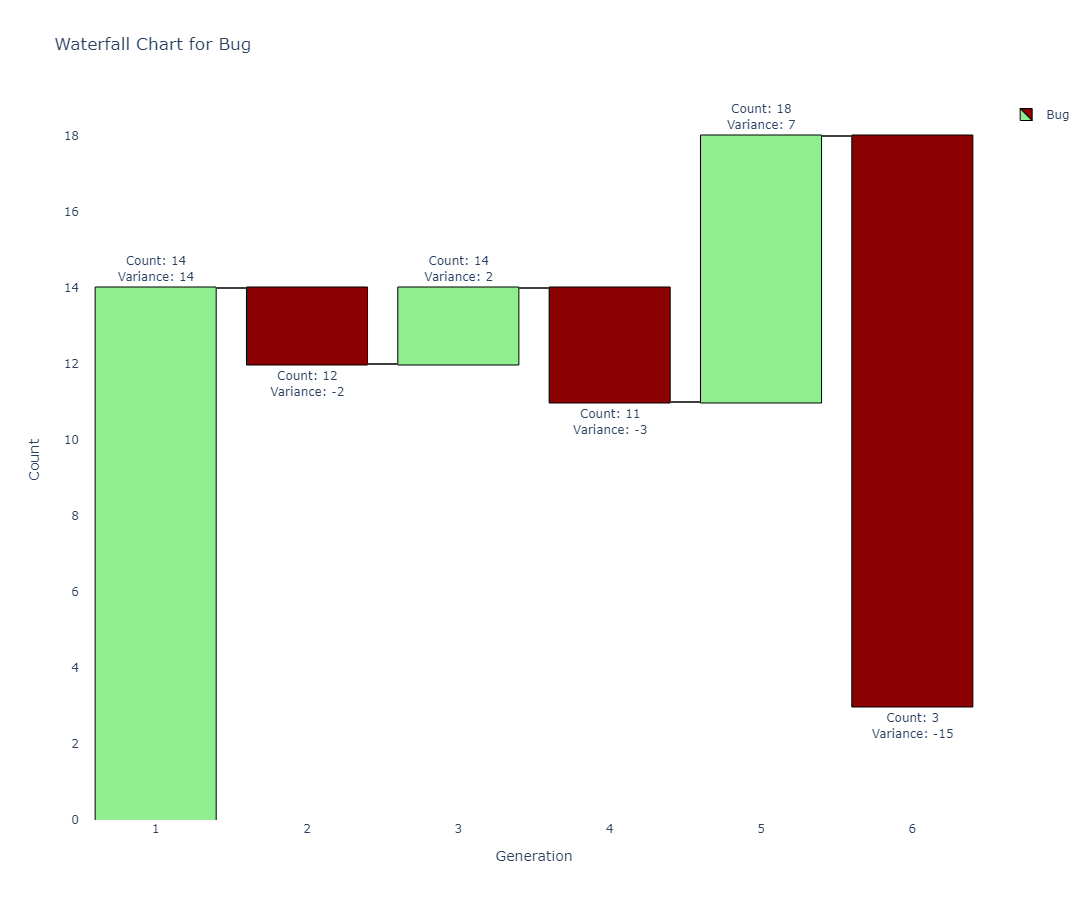

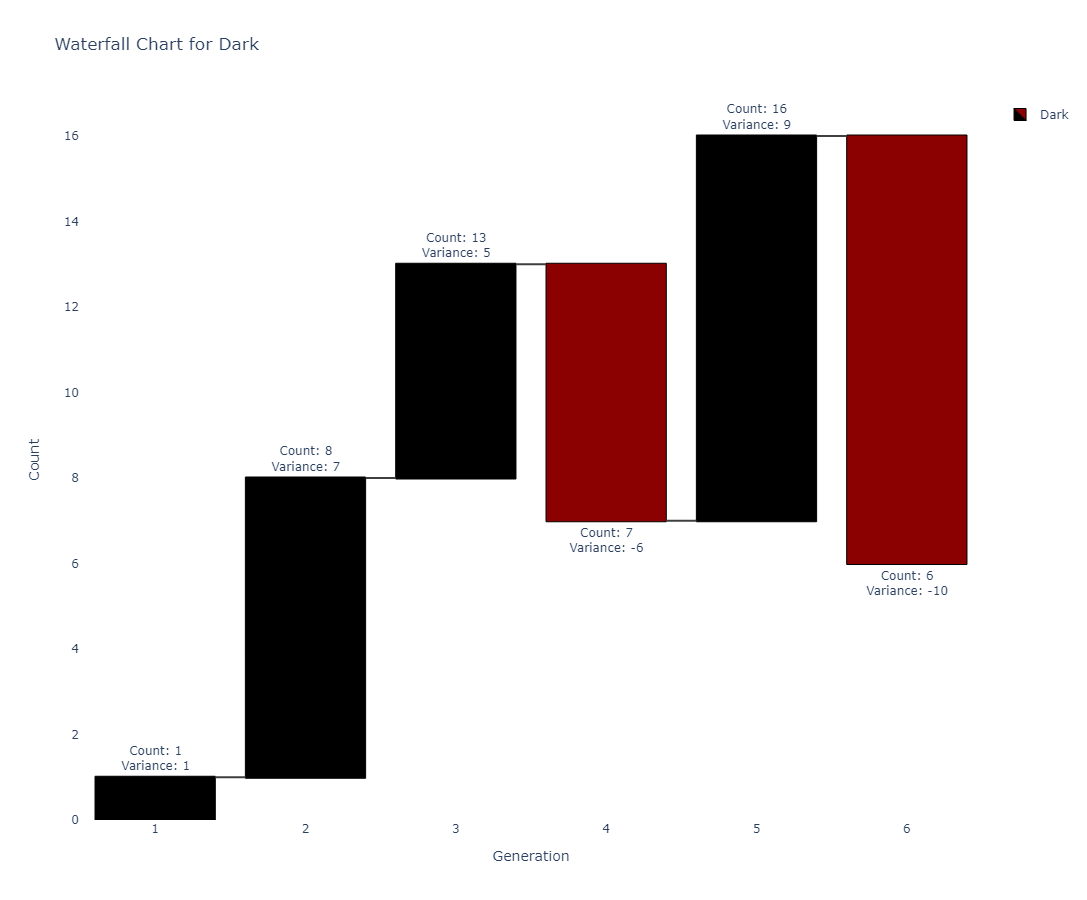

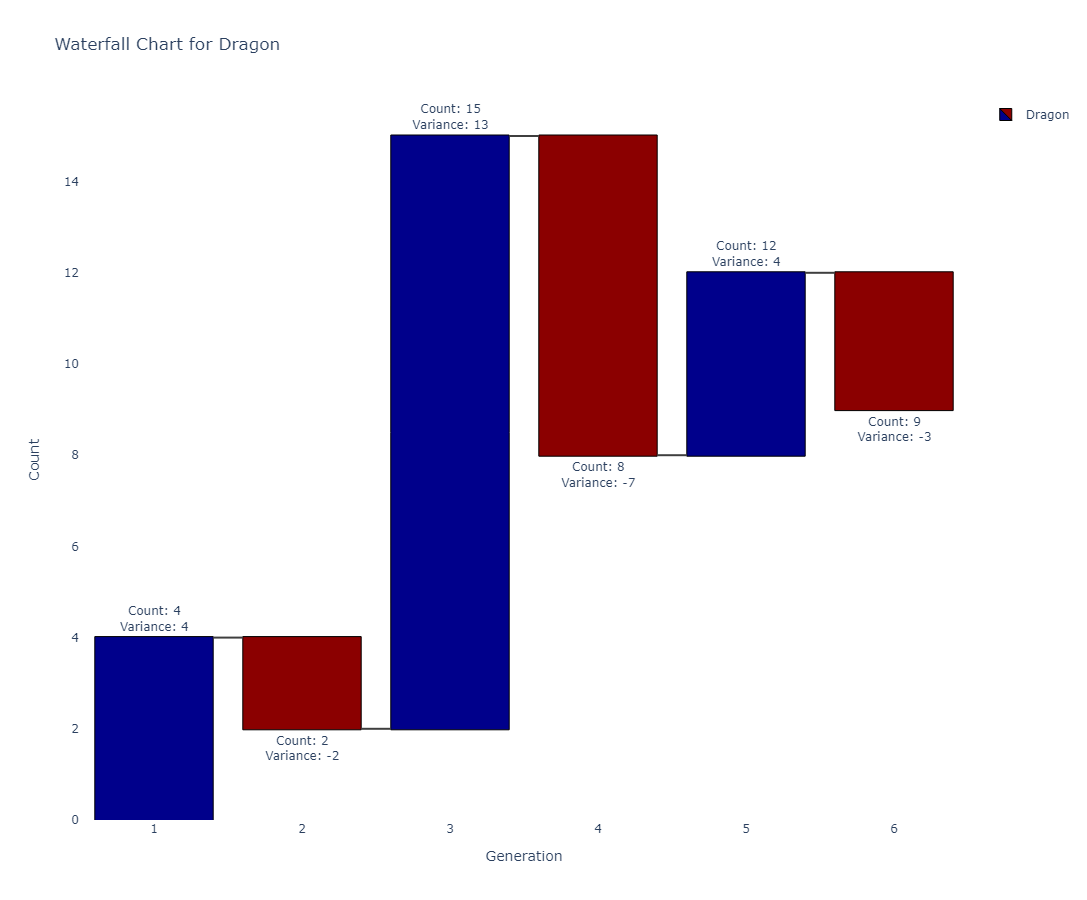

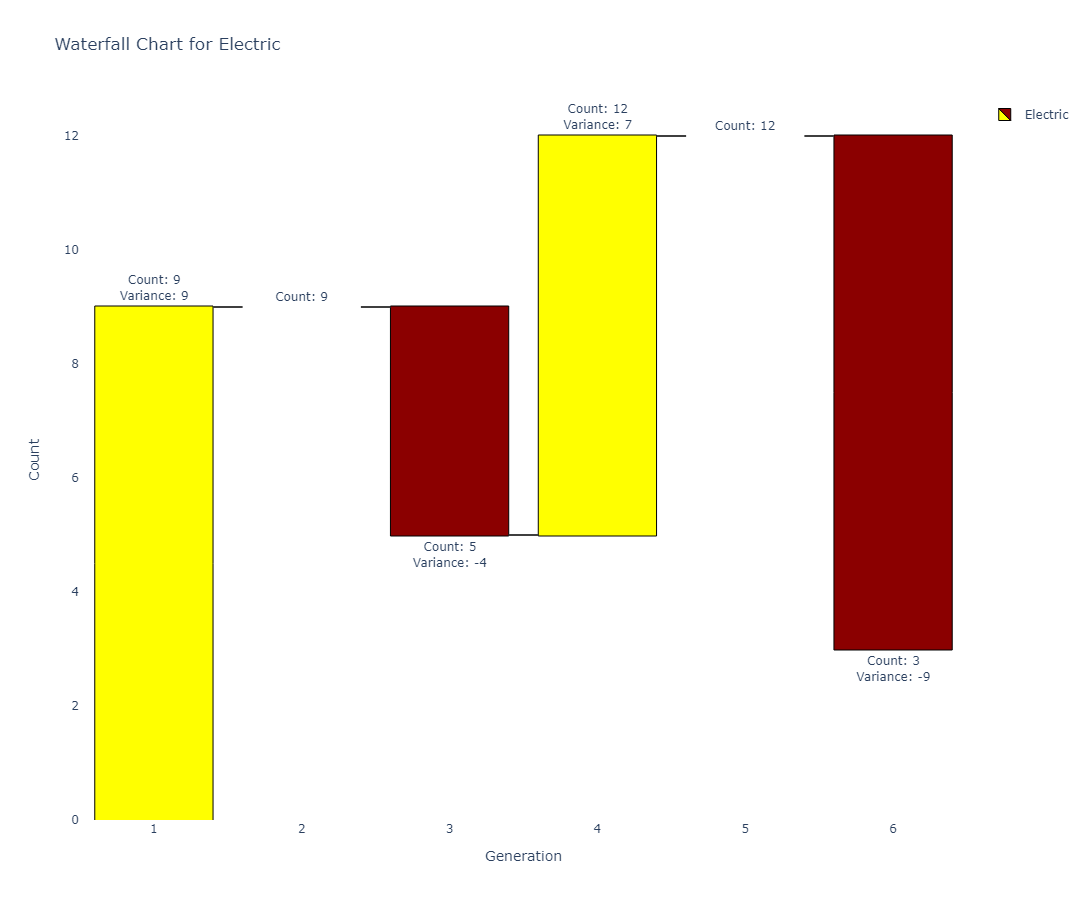

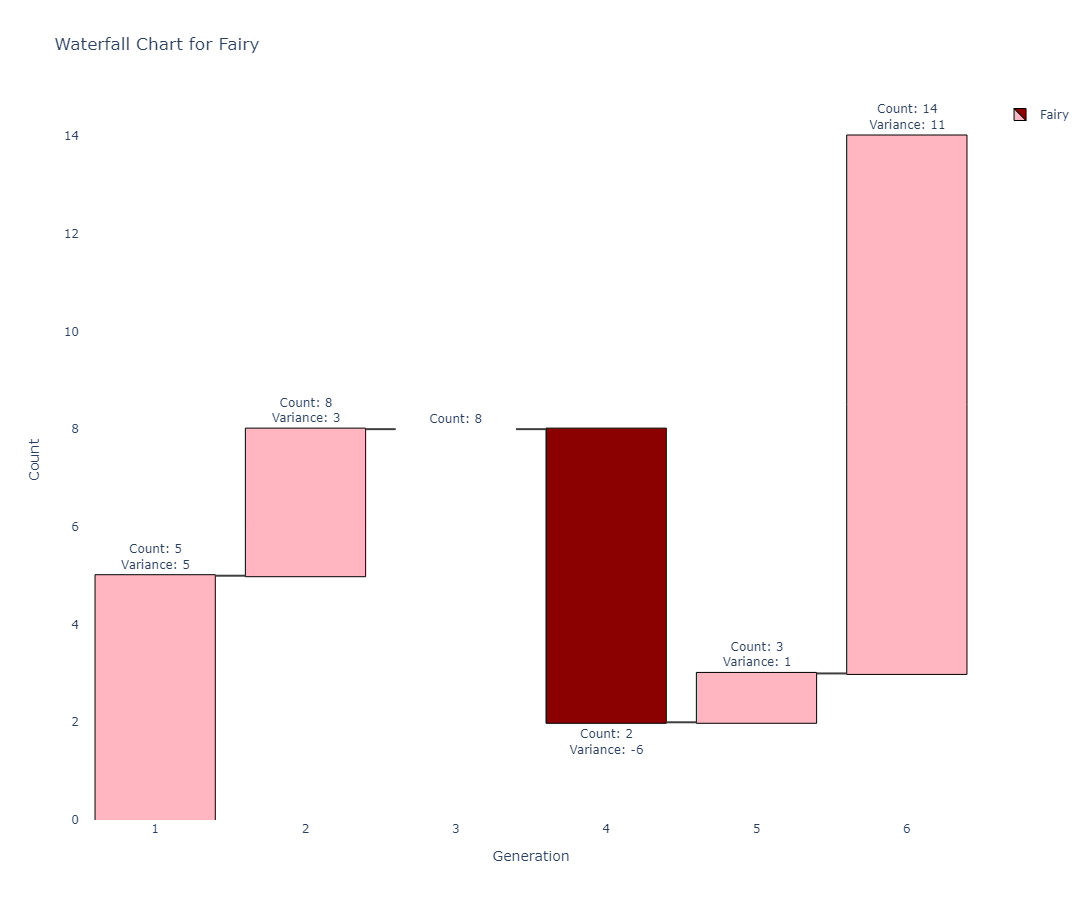

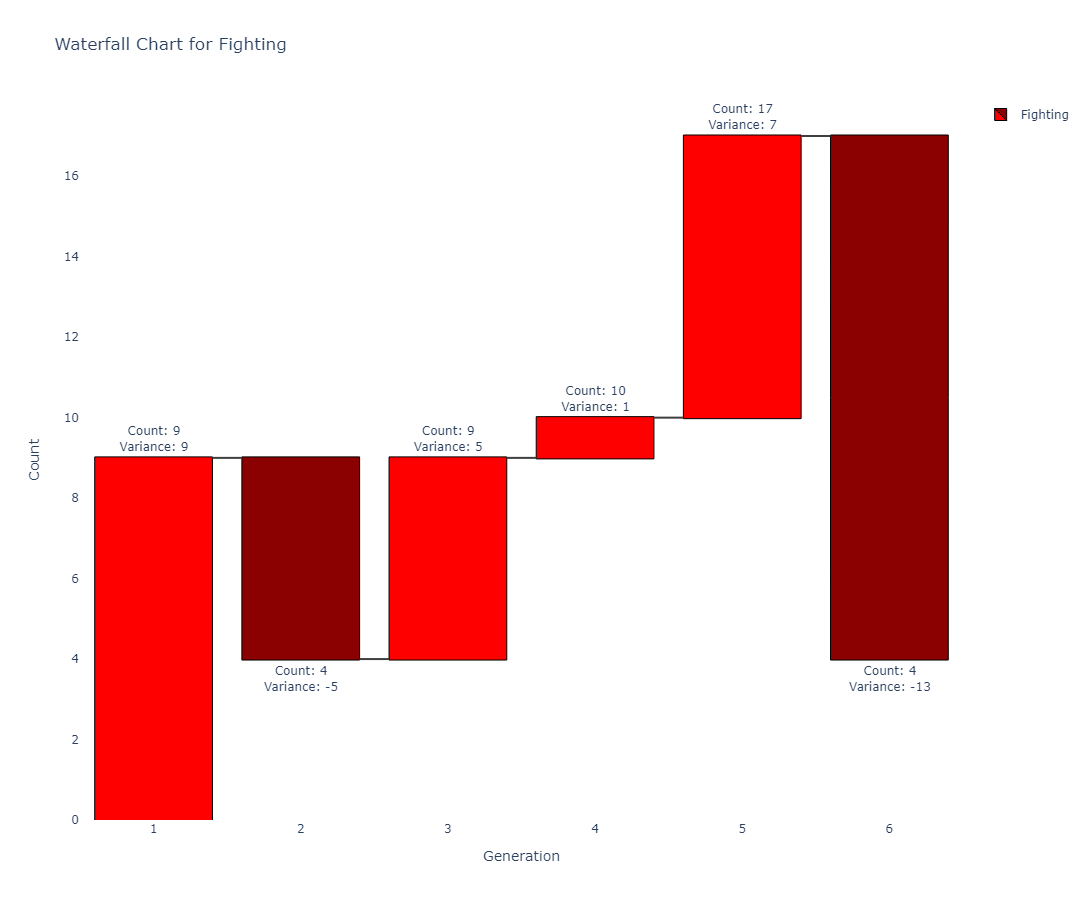

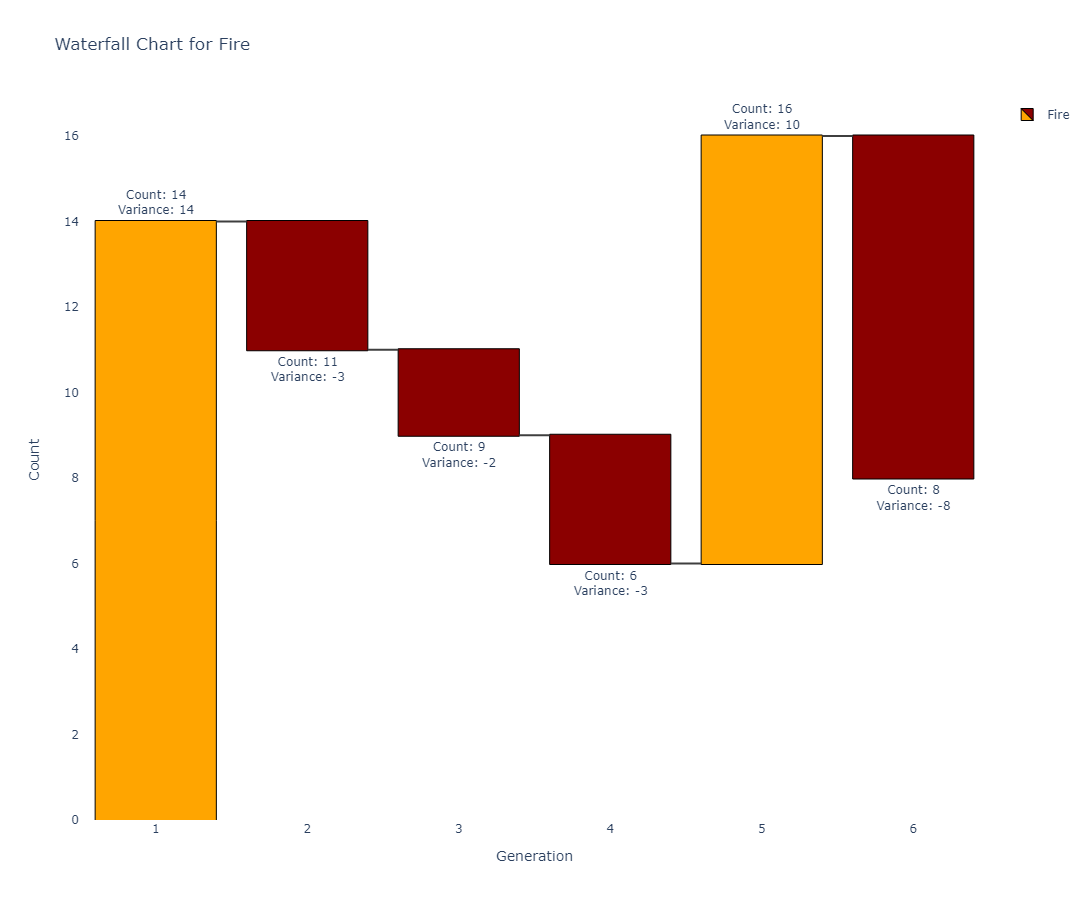

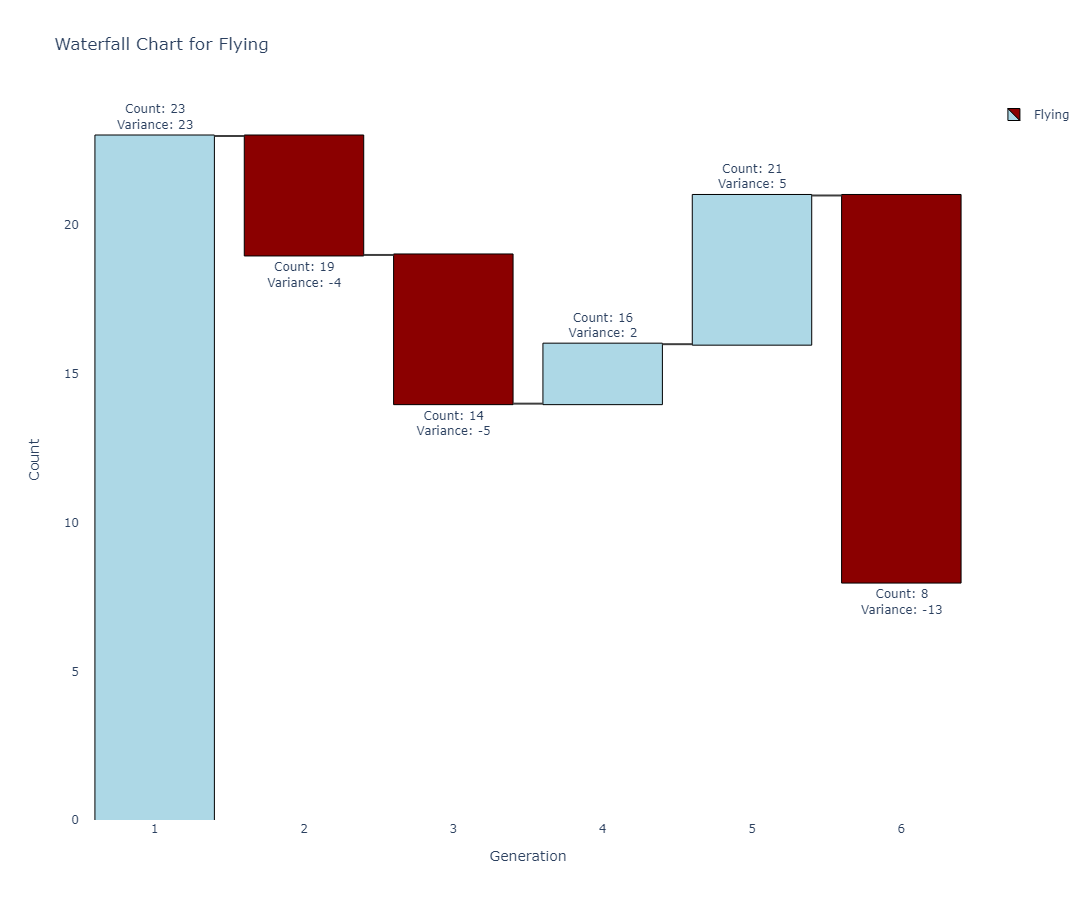

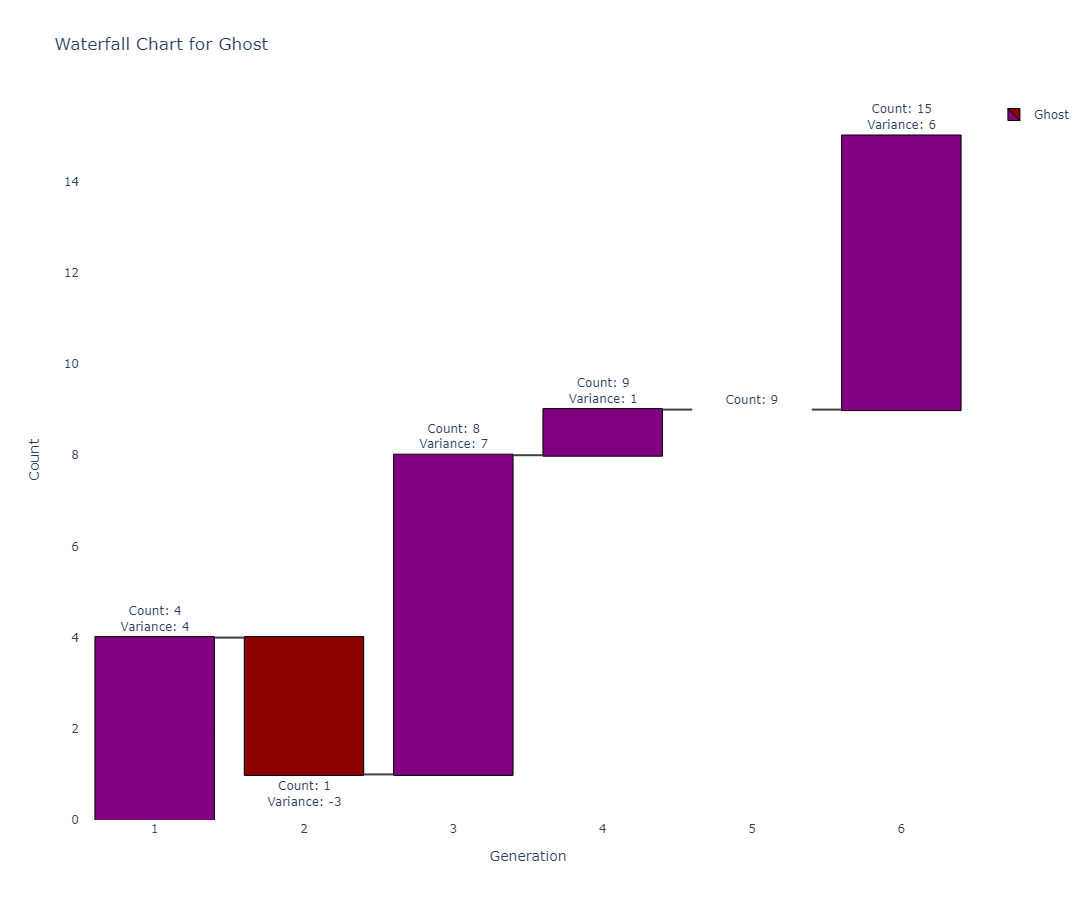

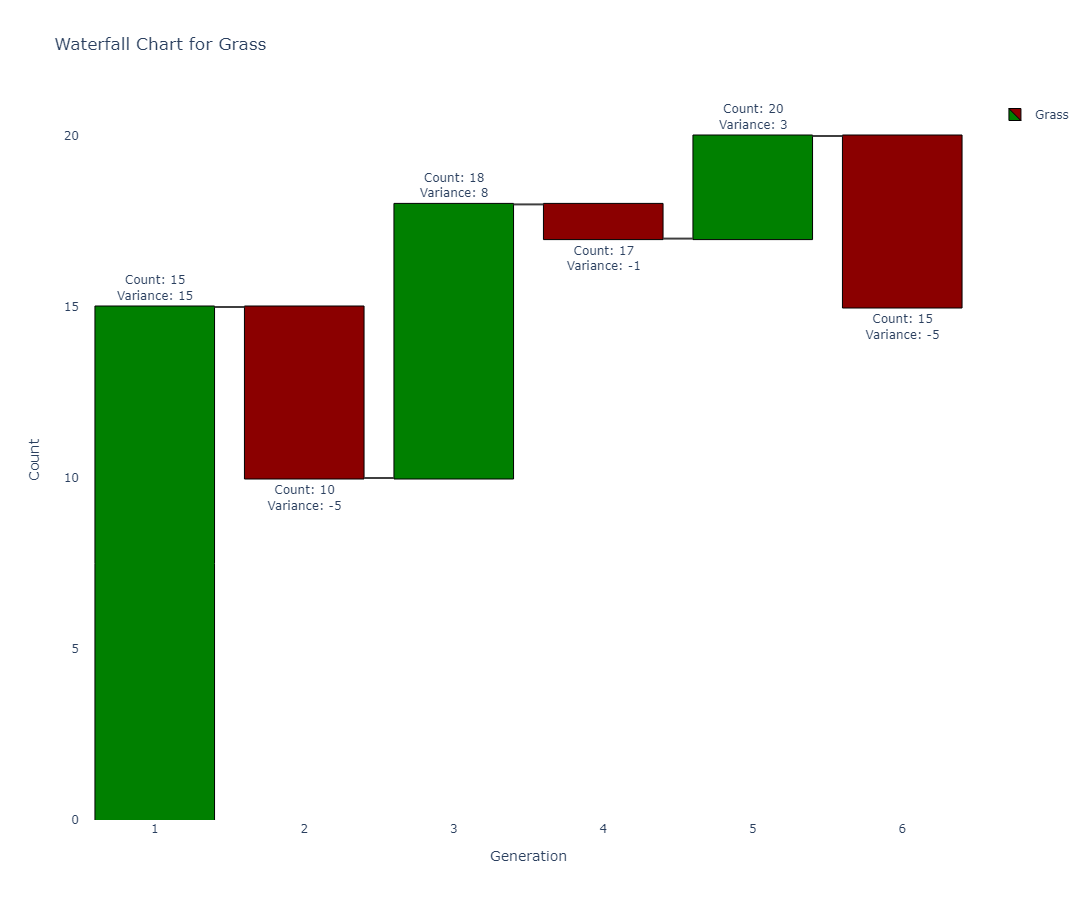

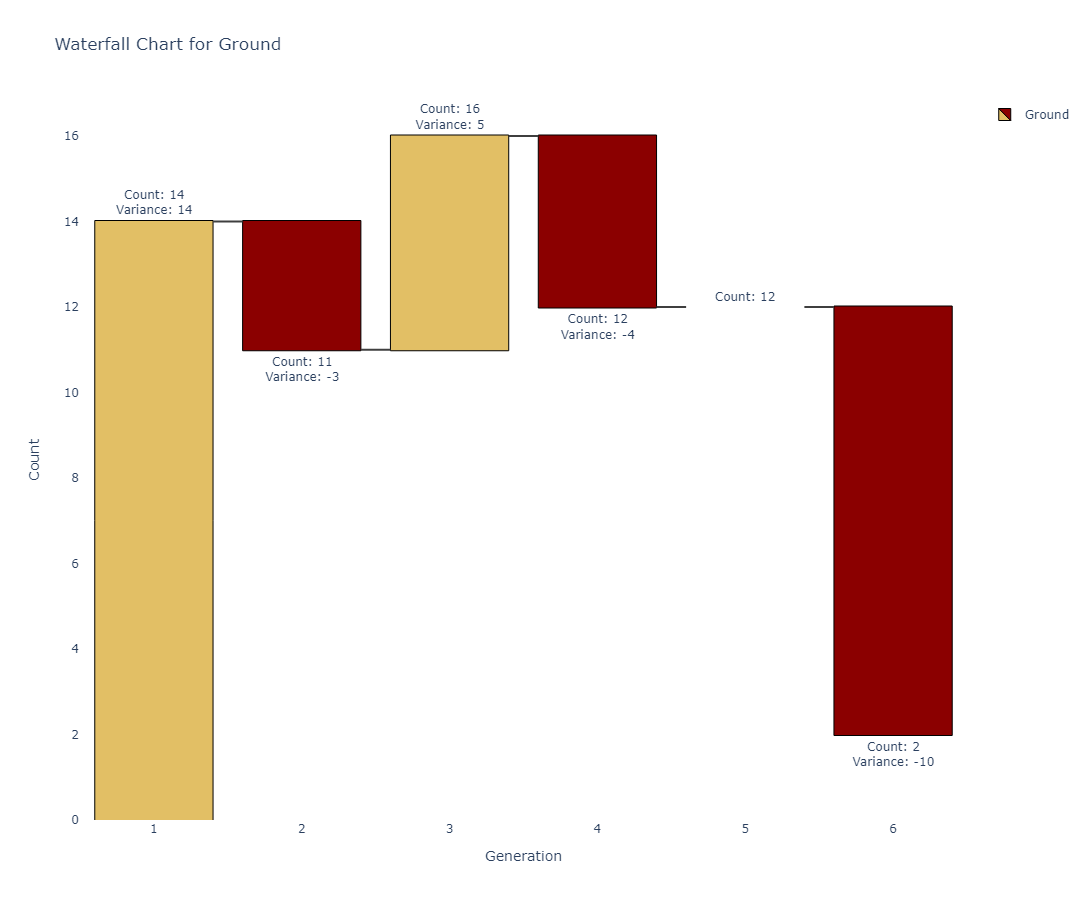

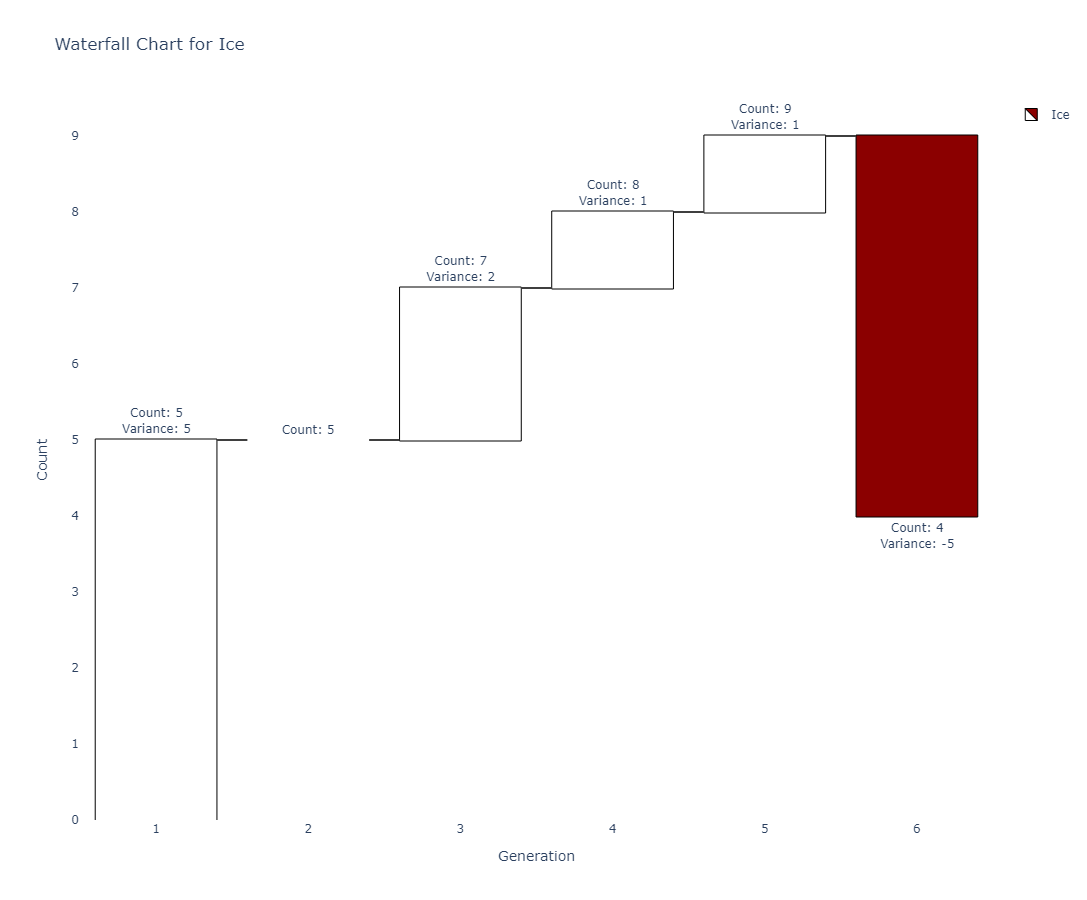

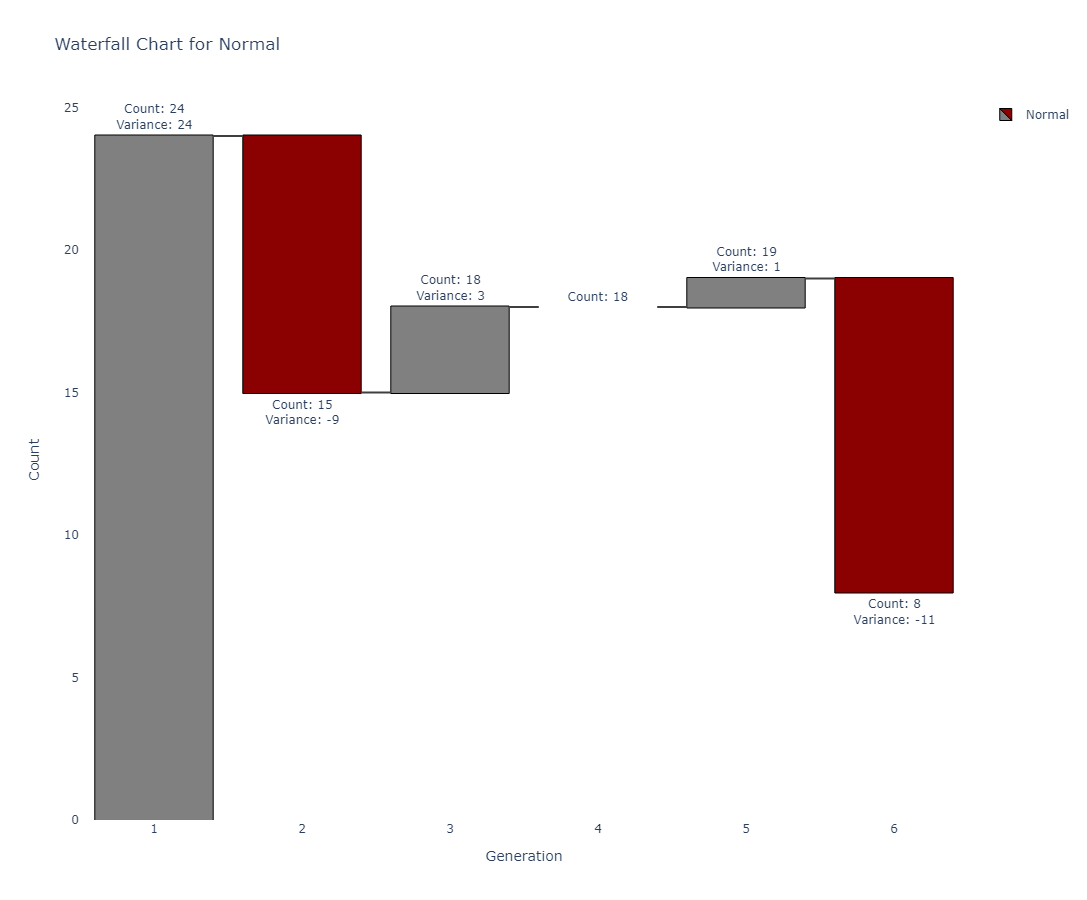

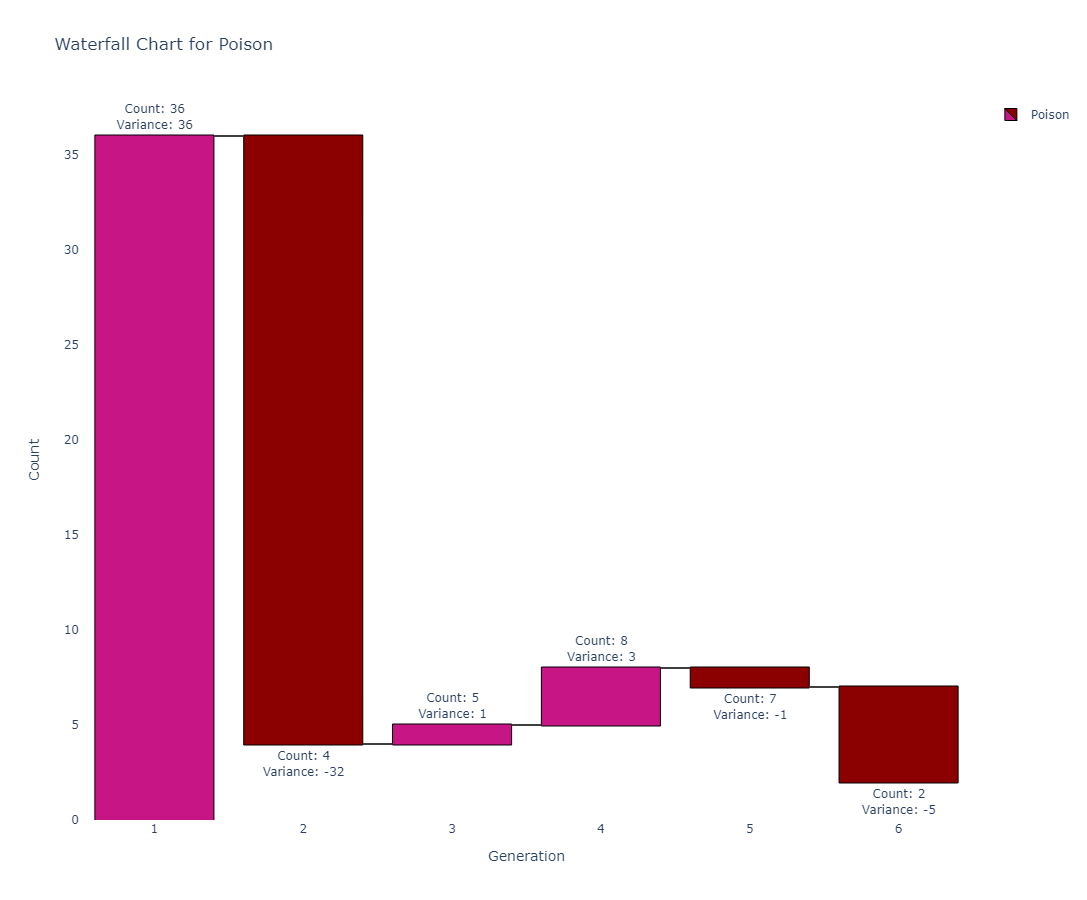

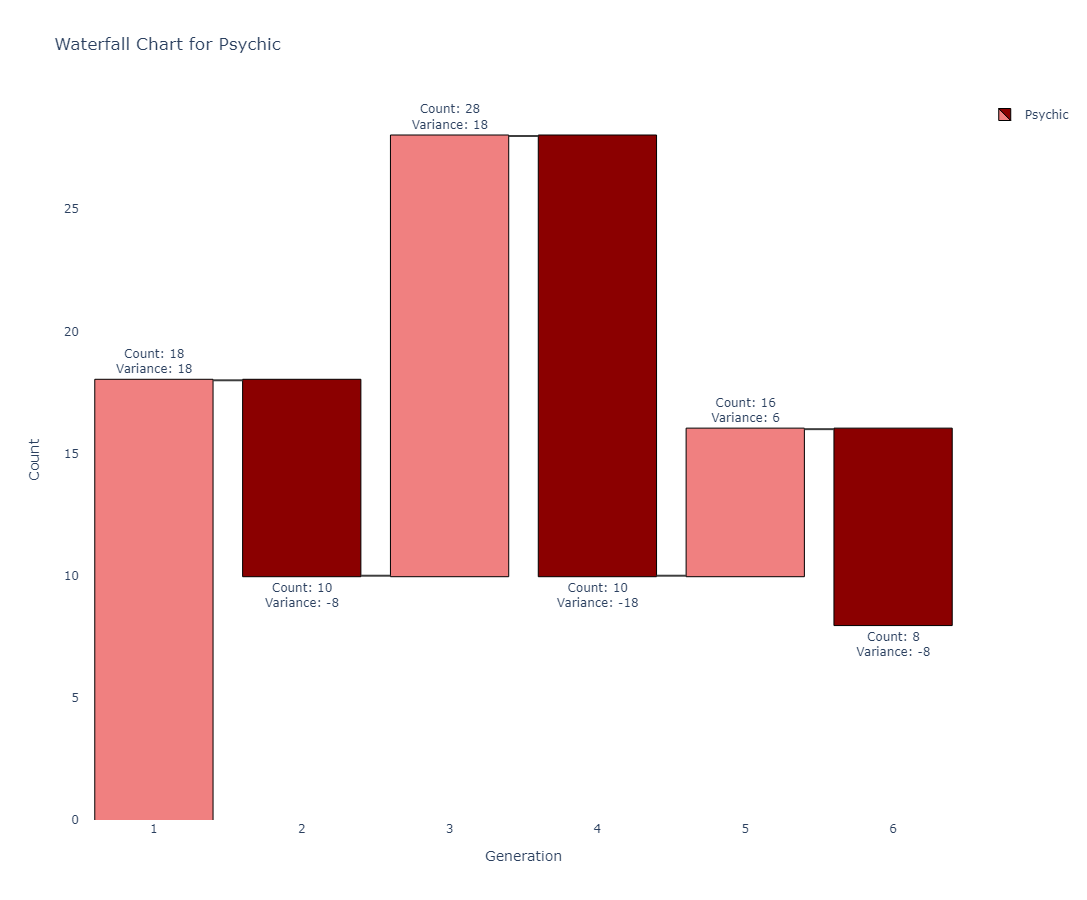

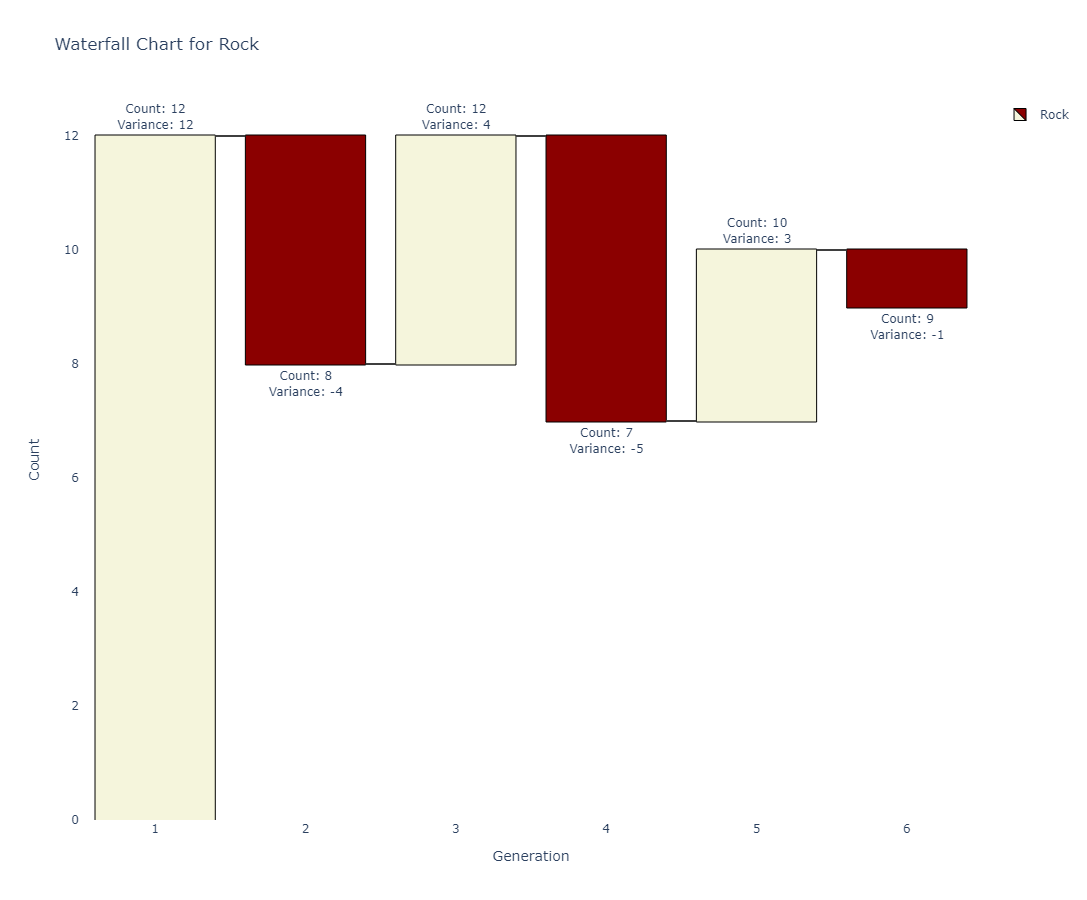

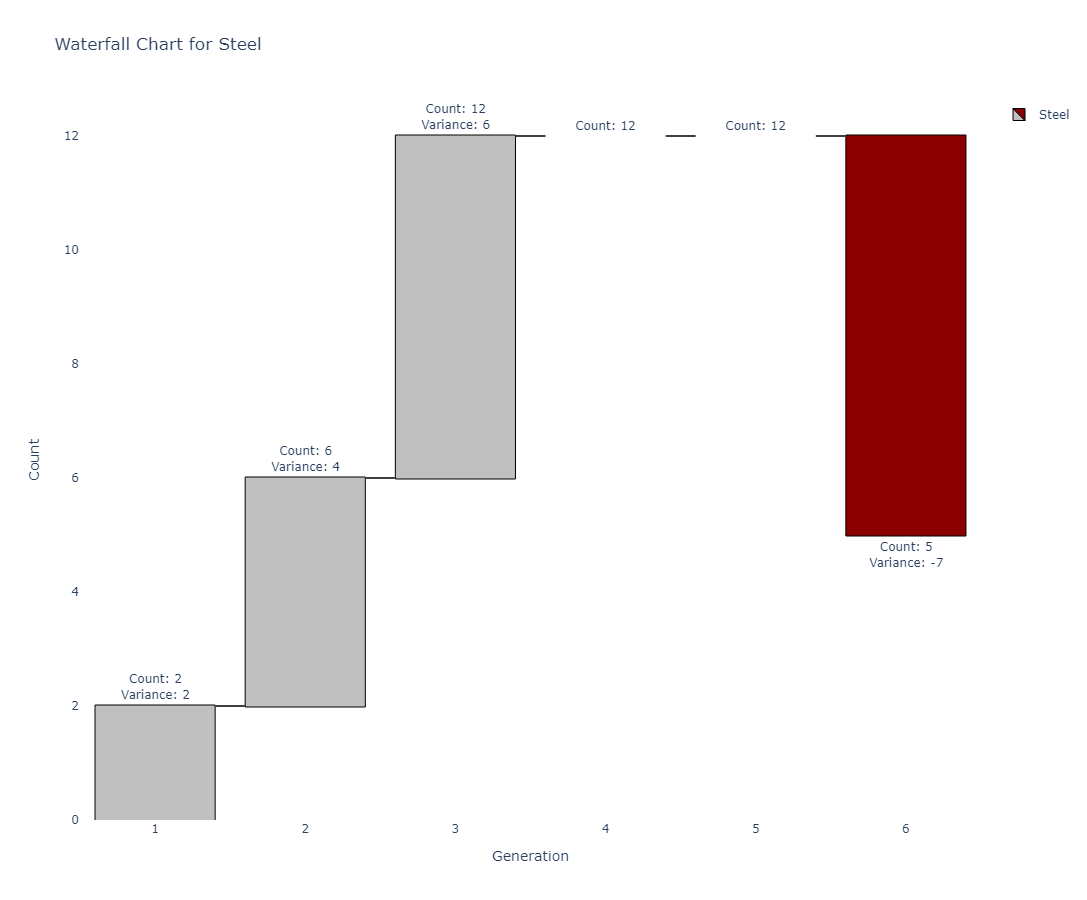

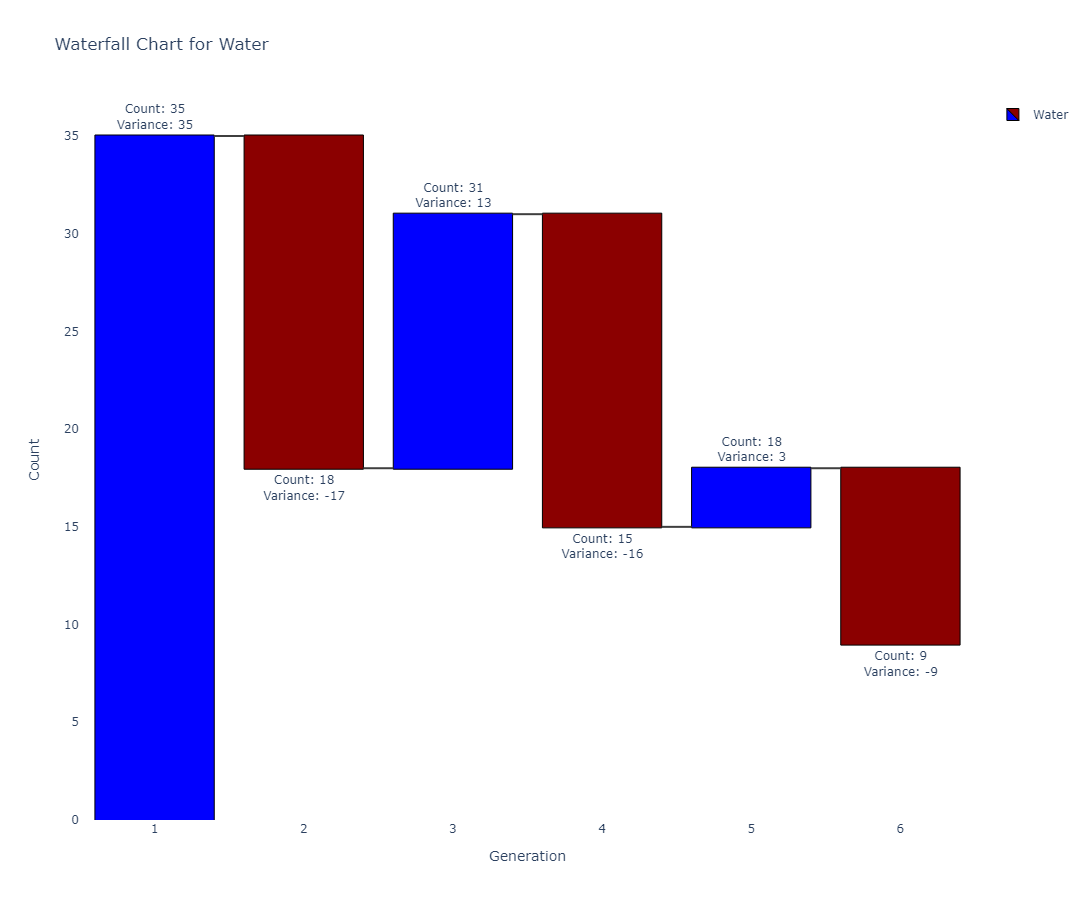

In [18]:
# Get unique types from df_count
unique_types = df_count['Type'].unique()

# Create a waterfall chart for each type
for selected_type in unique_types:
    # Filter the data for the selected Type
    selected_type_data = df_count[df_count['Type'] == selected_type]
    
    # Get the color for the selected type from type_colors
    type_color = type_colors.get(selected_type, 'gray')
    
    # Create a waterfall chart
    fig = go.Figure(go.Waterfall(
        name=selected_type,
        orientation="v",
        measure=selected_type_data['Variance'],
        x=selected_type_data['Generation'],
        textposition="outside",
        text=selected_type_data.apply(lambda row: f"Count: {int(row['Count'])}<br>Variance: {int(row['Variance'])}" if row['Variance'] != 0 else f"Count: {int(row['Count'])}",
                                axis=1),
        y=selected_type_data['Variance'],
        connector={"line": {"color": "rgb(63, 63, 63)"}},
        increasing=dict(marker=dict(color=type_color, line=dict(color='black', width=1))),
        decreasing=dict(marker=dict(color='darkred', line=dict(color='black', width=1))),
    ))

    # Update layout
    fig.update_layout(
        title=f"Waterfall Chart for {selected_type}",
        showlegend=True,
        xaxis_title="Generation",
        yaxis_title="Count",
        paper_bgcolor='rgba(0, 0, 0, 0)',  # Set background color
        plot_bgcolor='rgba(0, 0, 0, 0)',  # Set plot area color
        height=900  # Set the desired height in pixels
    )

    # Show the figure
    fig.show()

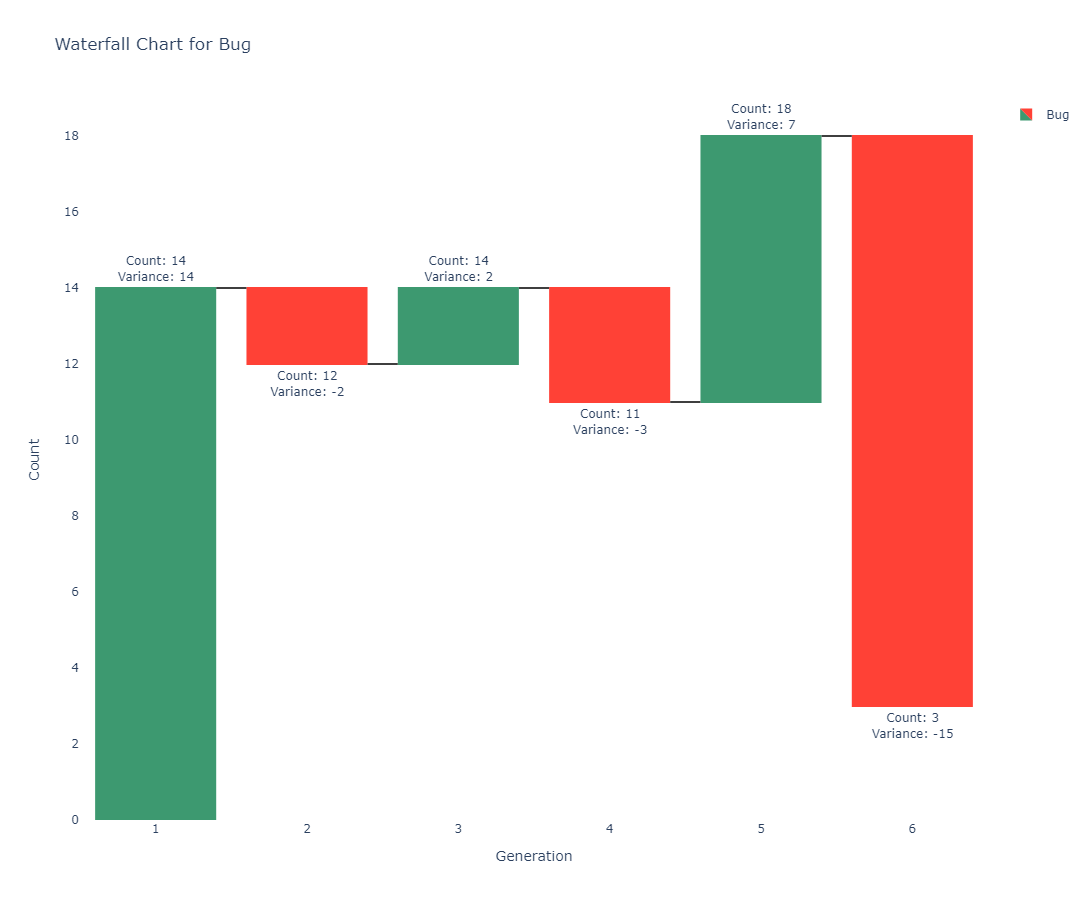

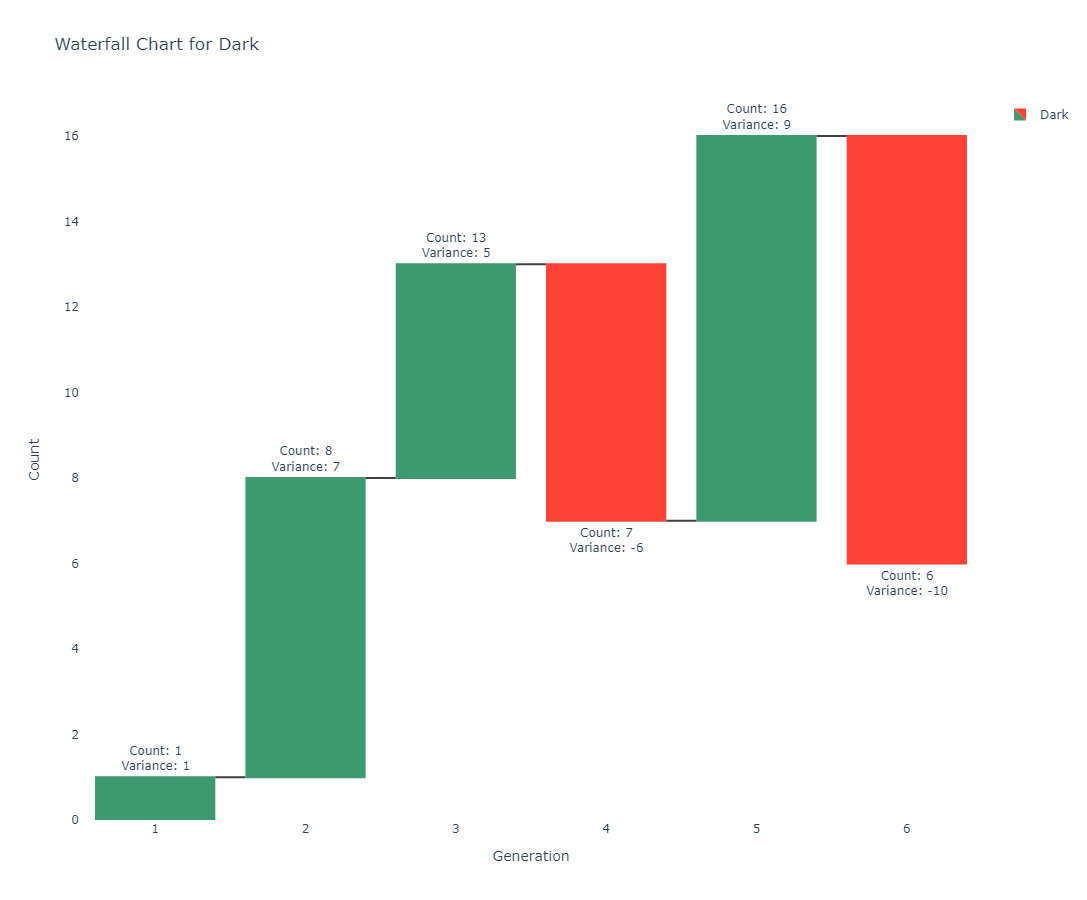

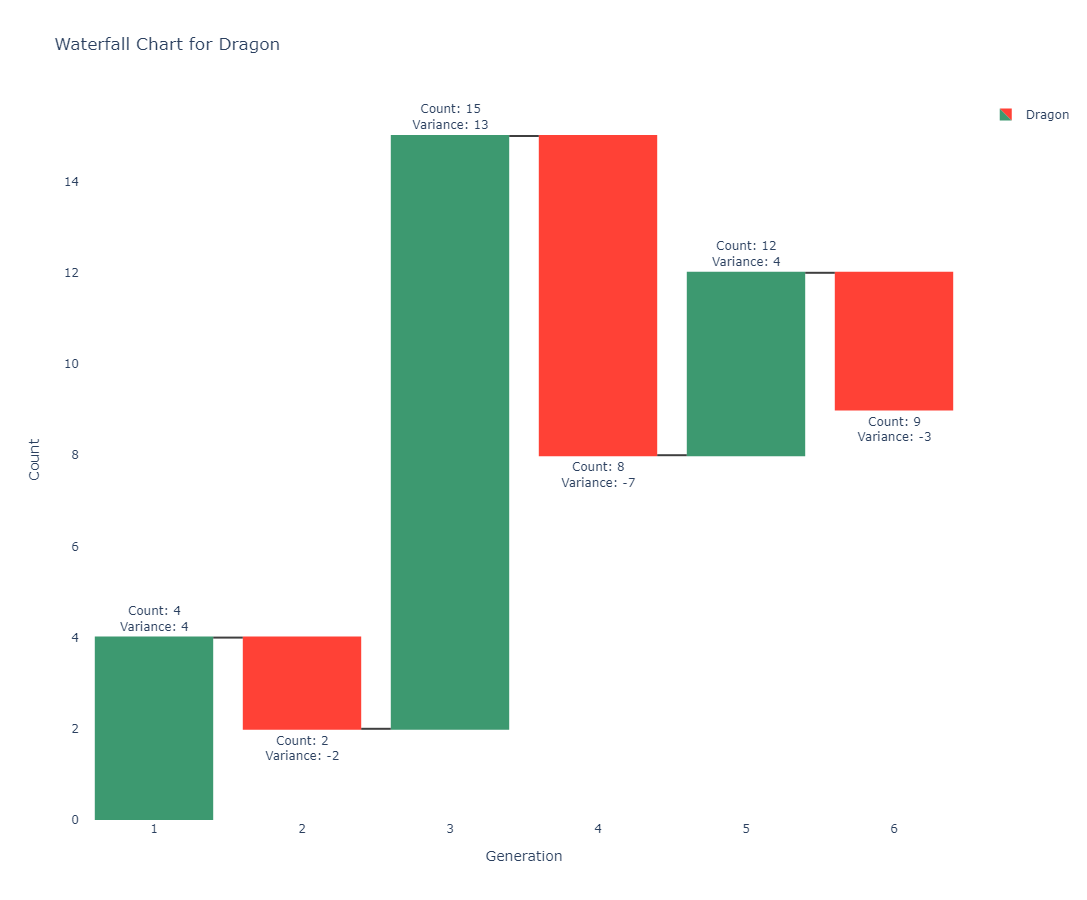

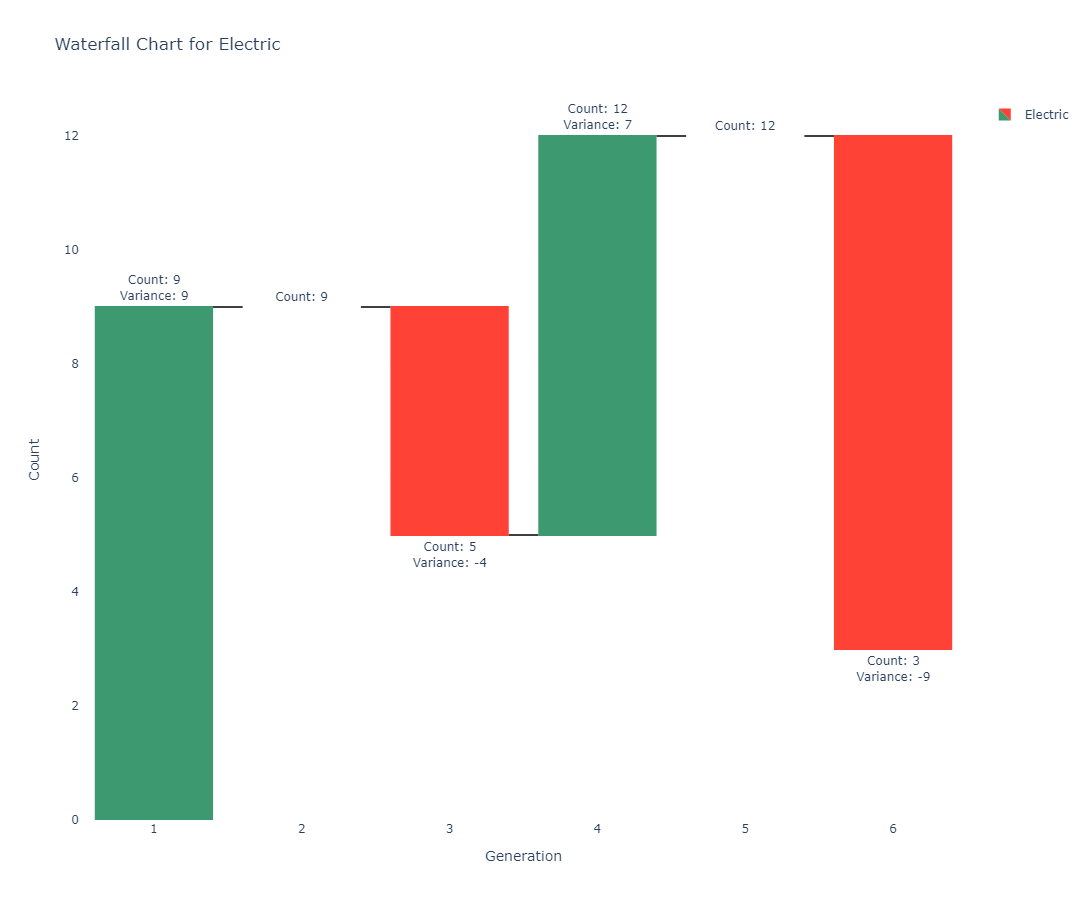

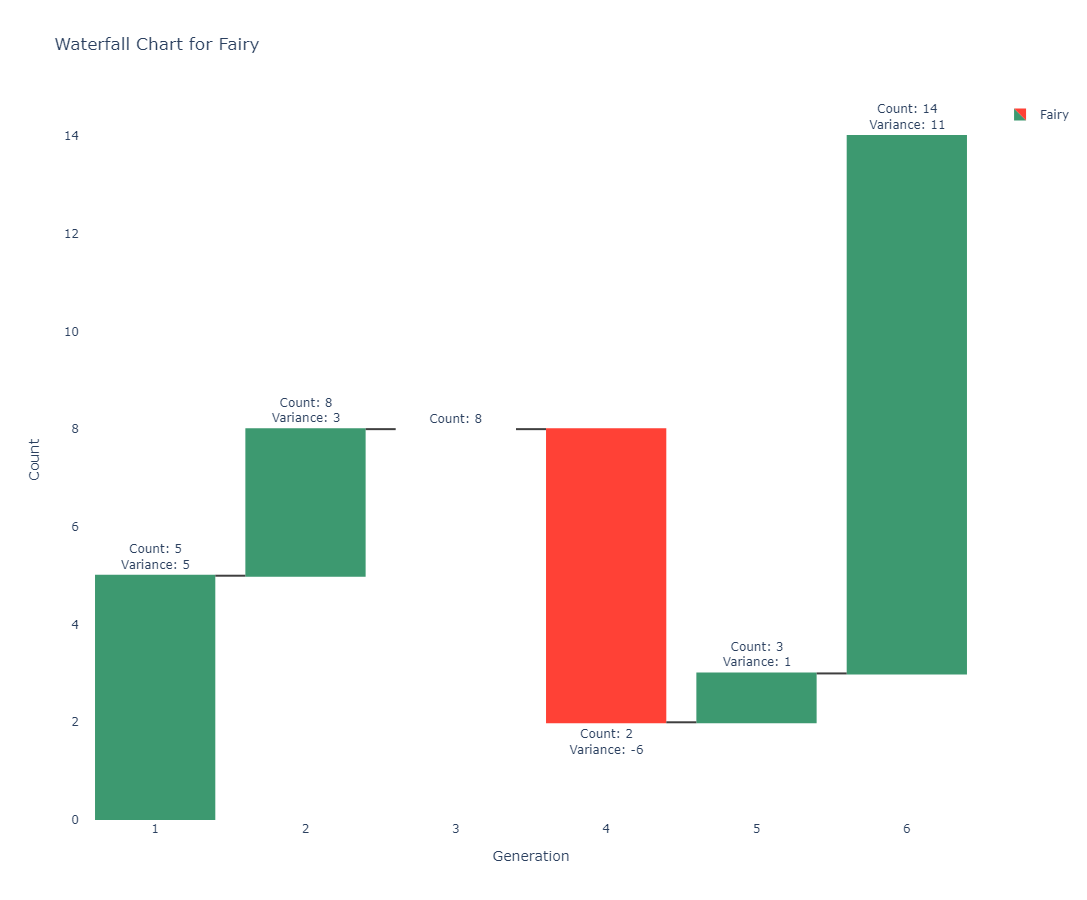

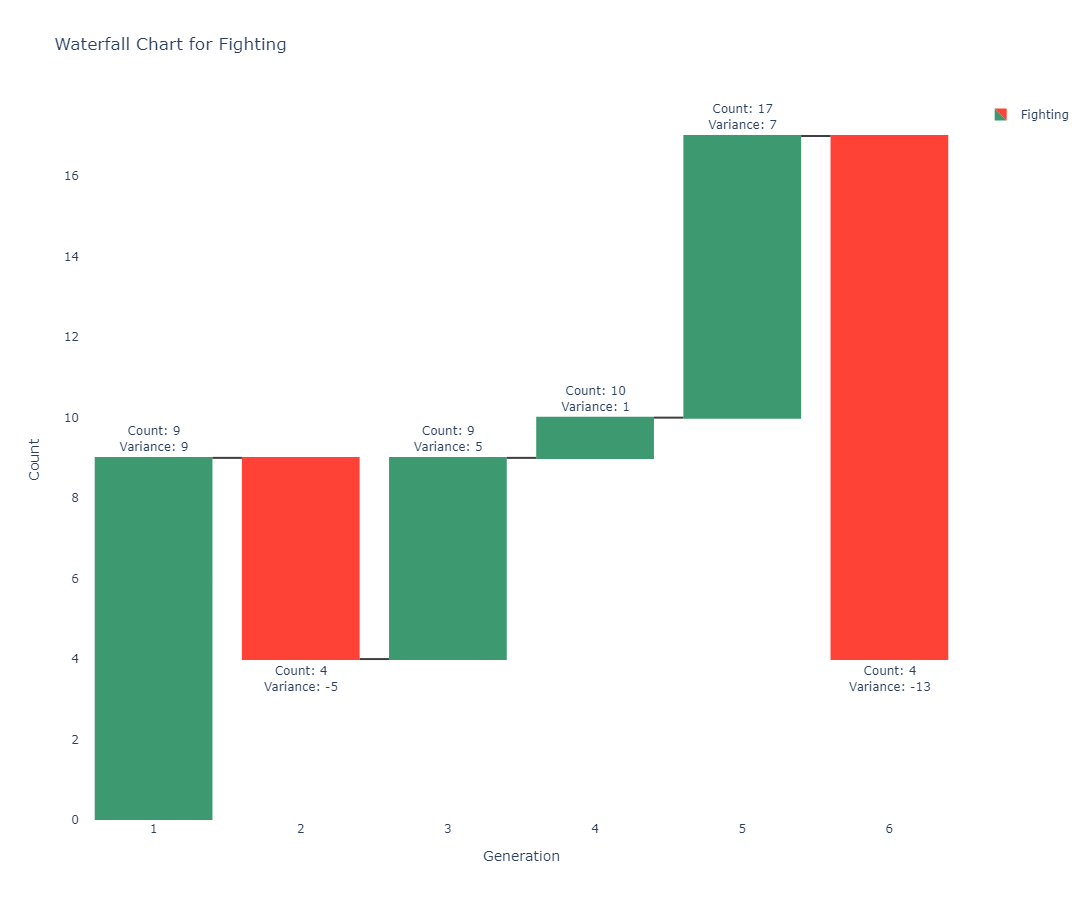

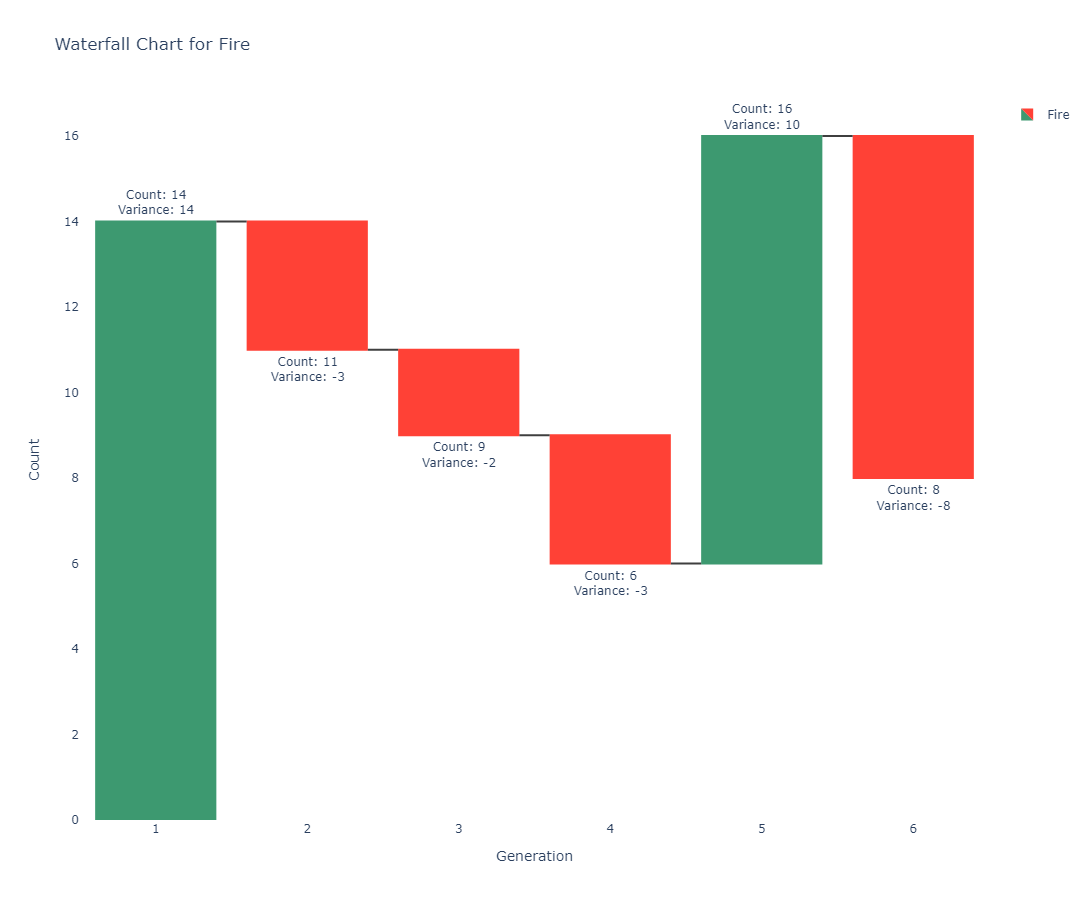

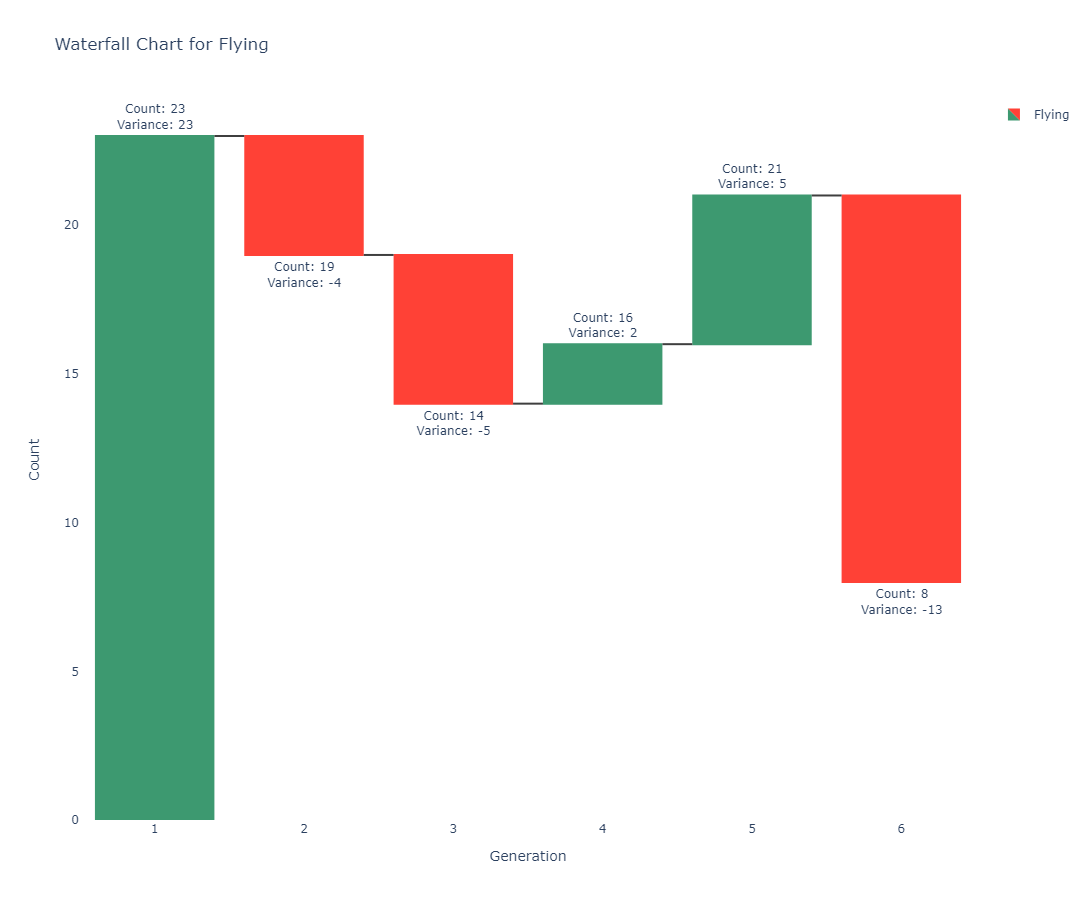

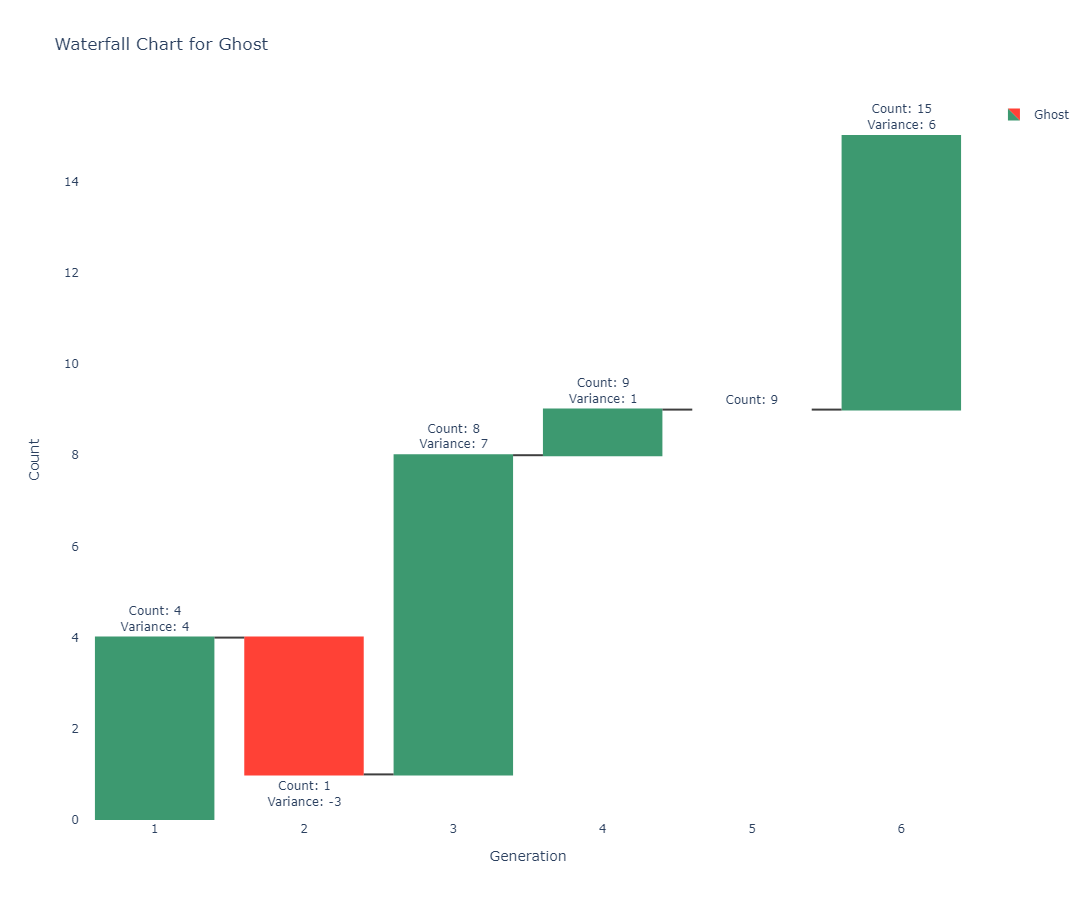

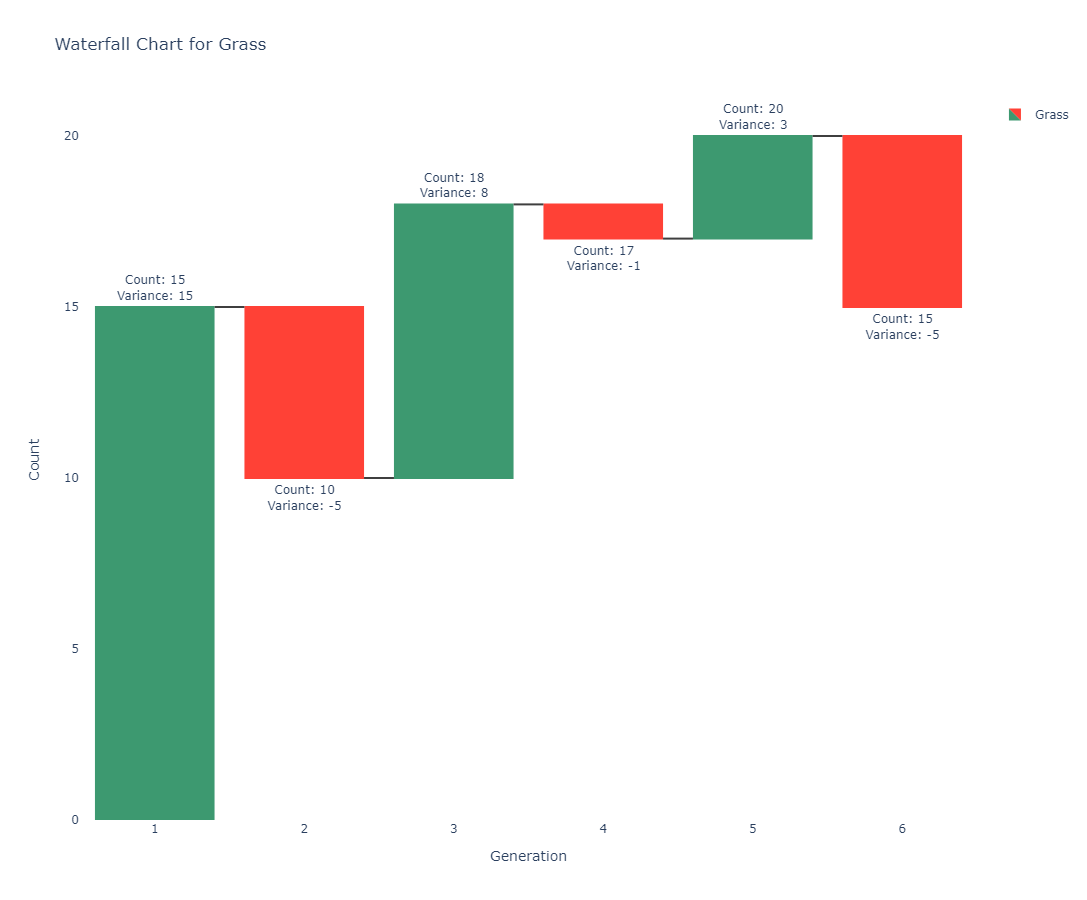

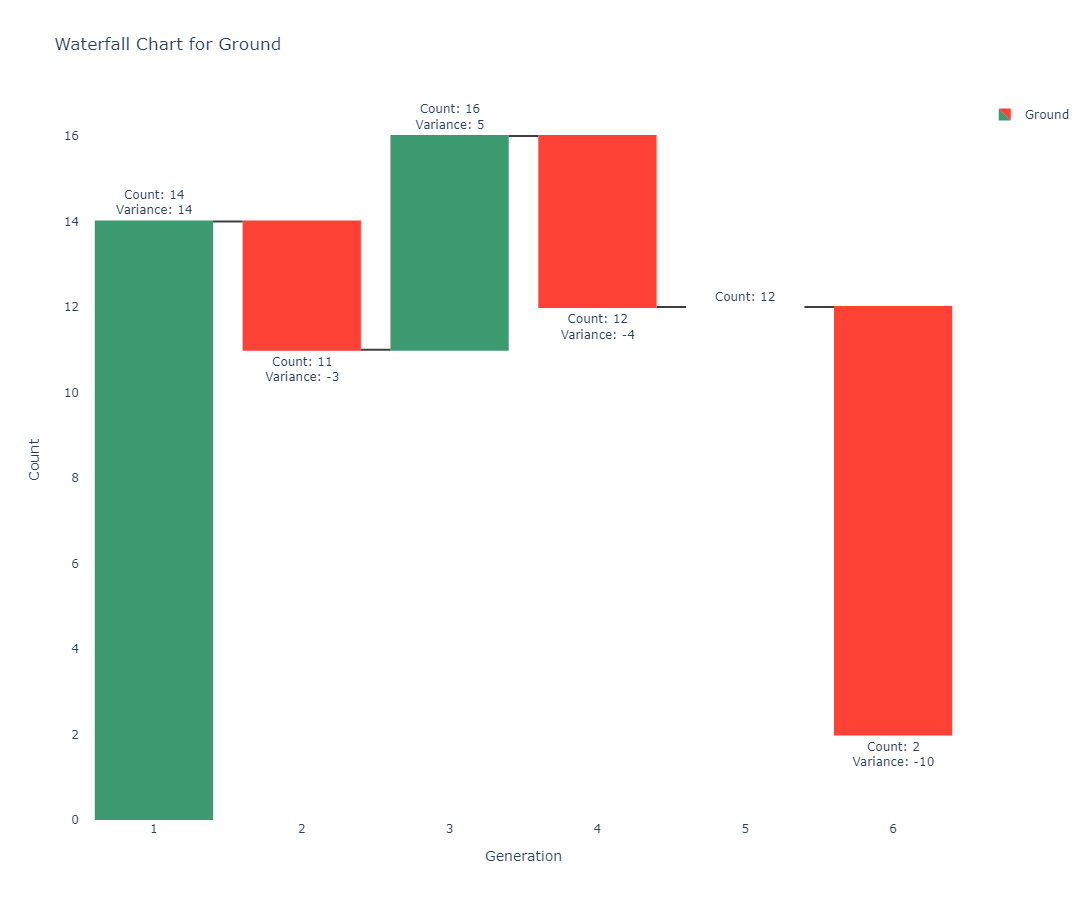

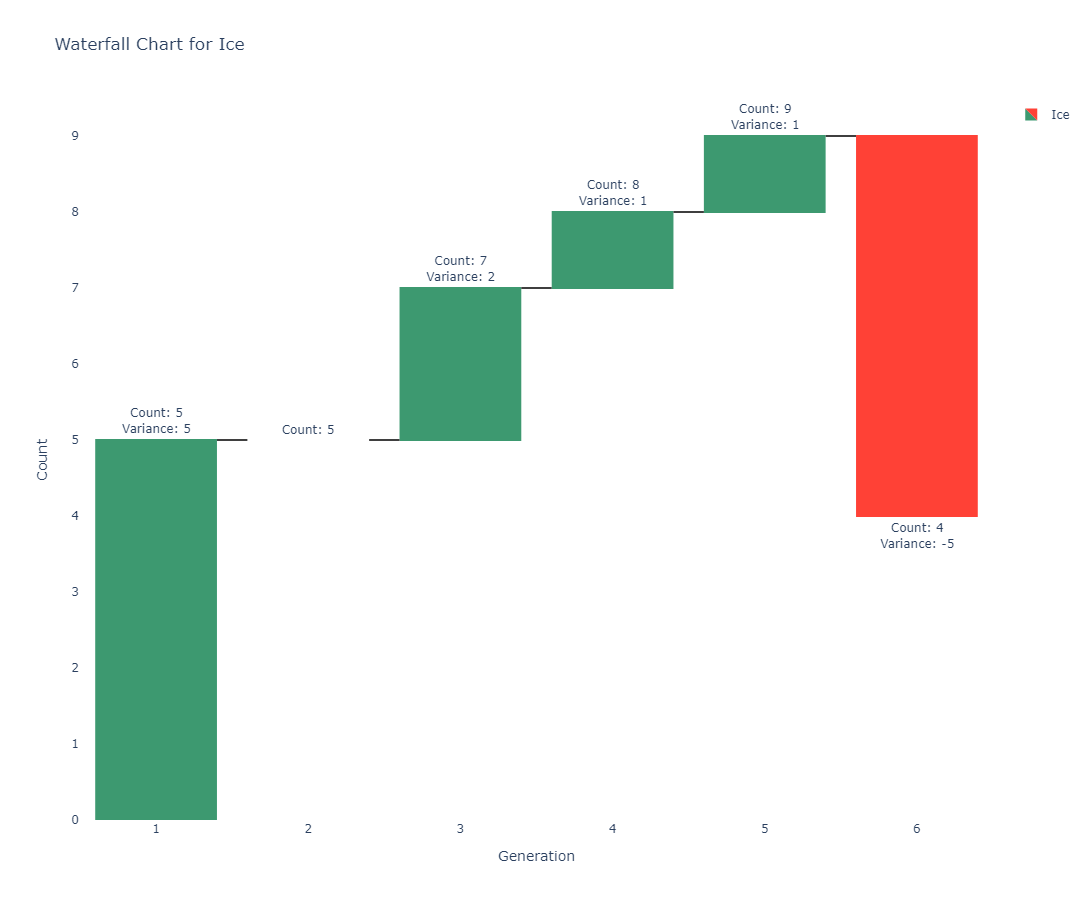

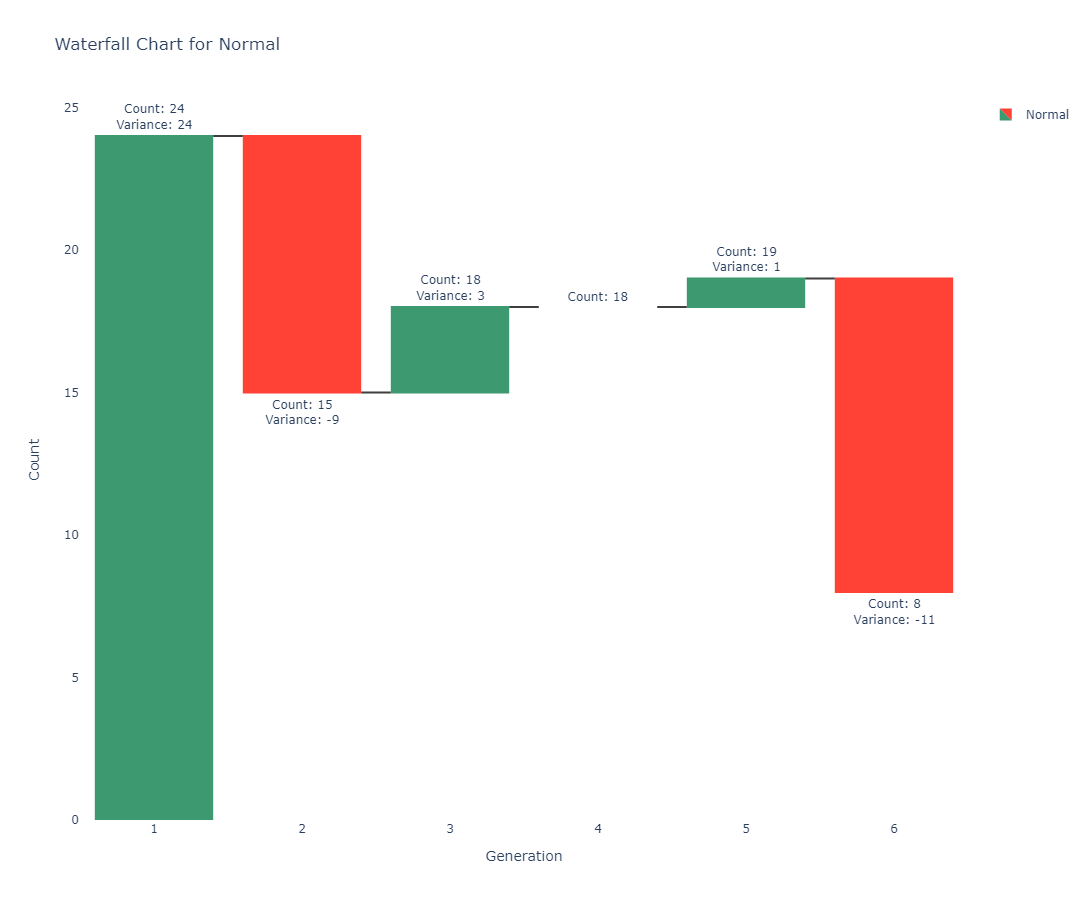

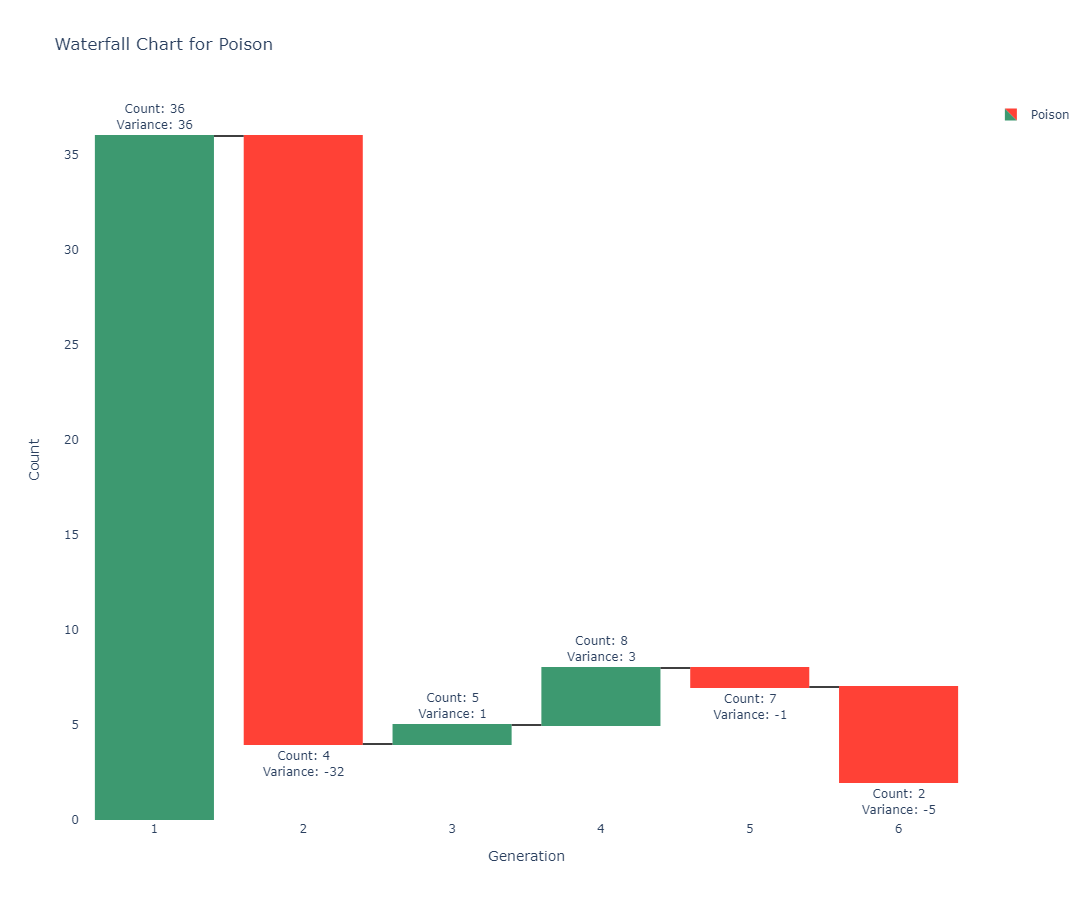

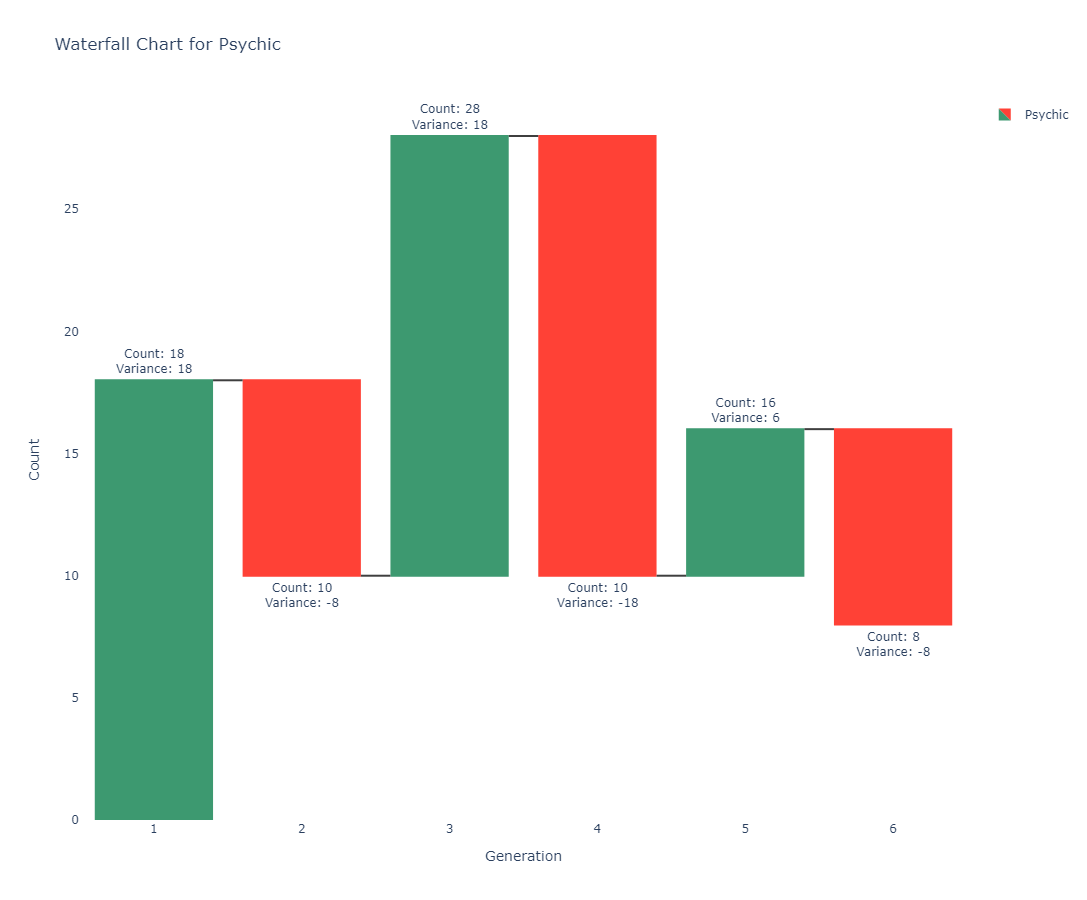

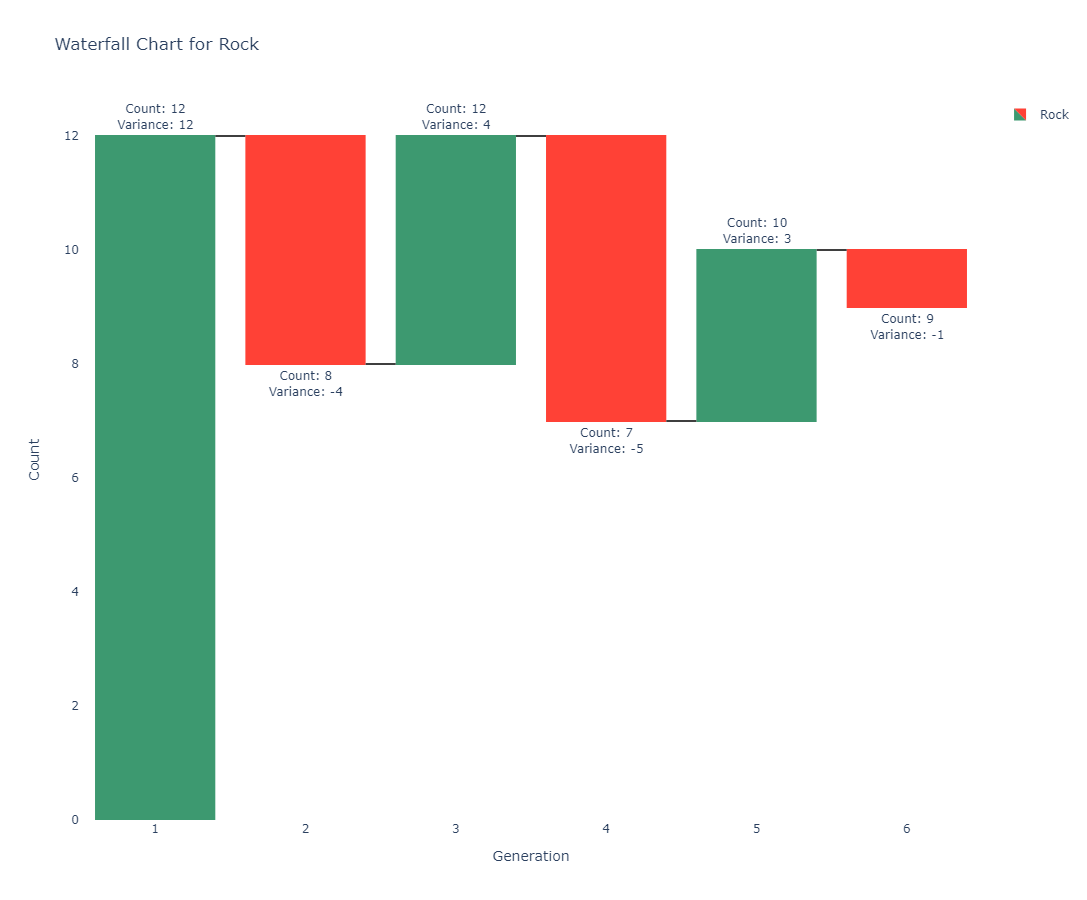

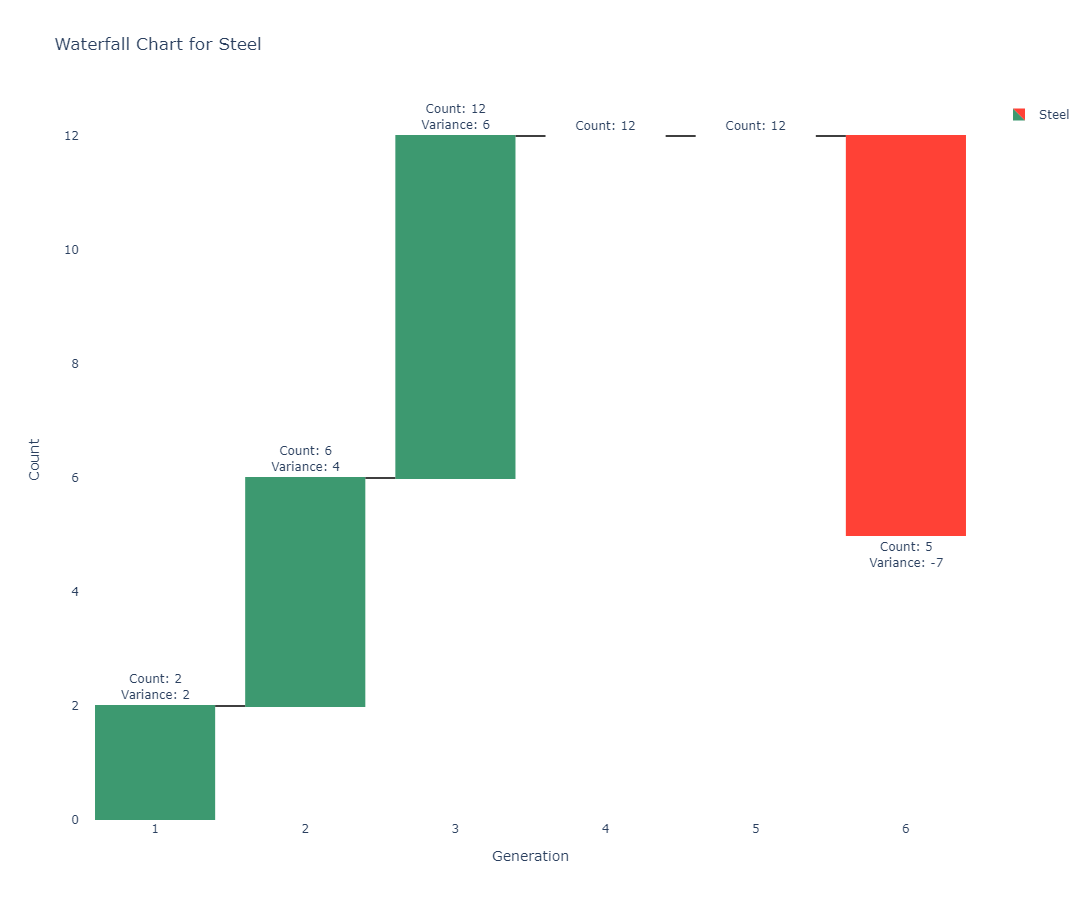

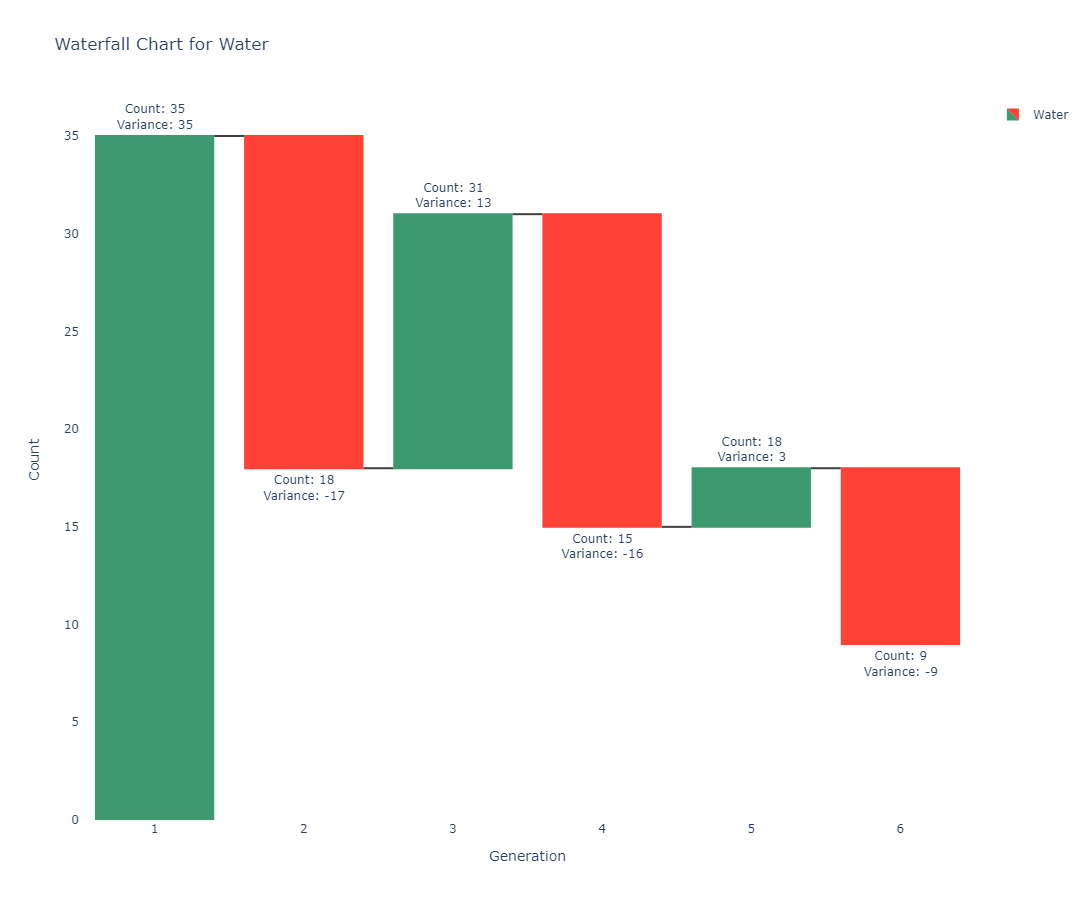

In [19]:
# Get unique types from df_count
unique_types = df_count['Type'].unique()

# Create a waterfall chart for each type
for selected_type in unique_types:
    # Filter the data for the selected Type
    selected_type_data = df_count[df_count['Type'] == selected_type]
    
    # Create a waterfall chart
    fig = go.Figure(go.Waterfall(
        name=selected_type,
        orientation="v",
        measure=selected_type_data['Variance'],
        x=selected_type_data['Generation'],
        textposition="outside",
        text=selected_type_data.apply(lambda row: f"Count: {int(row['Count'])}<br>Variance: {int(row['Variance'])}" if row['Variance'] != 0 else f"Count: {int(row['Count'])}",
                                axis=1),
        y=selected_type_data['Variance'],
        connector={"line": {"color": "rgb(63, 63, 63)"}},
    ))

    # Update layout
    fig.update_layout(
        title=f"Waterfall Chart for {selected_type}",
        showlegend=True,
        xaxis_title="Generation",
        yaxis_title="Count",
        paper_bgcolor='rgba(0, 0, 0, 0)',  # Set background color
        plot_bgcolor='rgba(0, 0, 0, 0)',  # Set plot area color
        height=900  # Set the desired height in pixels
    )

    # Show the figure
    fig.show()